In [2]:
import pandas as pd

from tensorflow import keras
from keras import layers

from src.utils import(
    read_data,
    train_model, 
    print_testing_loss_accuracy, 
    calculate_average_measures
)

from src.preprocessing import Preprocessor
from src.plotting import PlottingManager

In [3]:
def build_cnn_model() -> keras.models.Sequential:
    """
    Build and compile a CNN based model.

    Returns:
    --------
    - model : keras.models.Sequential
        A compiled model that will be trained later.
    """
    
    model = keras.Sequential([
        layers.Input(shape=(500,)),
        layers.Embedding(input_dim=2000, output_dim=8, input_length=500, mask_zero=True),
        layers.Conv1D(filters=50, kernel_size=10, activation="relu"),
        layers.MaxPool1D(pool_size=2, strides=2),
        layers.GlobalAveragePooling1D(),
        layers.Dropout(0.2),
        layers.Dense(10, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

    return model

In [4]:
X_train, X_test, y_train, y_test = read_data()

In [5]:
preprocessor = Preprocessor()
plotter = PlottingManager()

In [6]:
text_vectorizer_1, X_train_vectors_1 = preprocessor.convert_text_to_vectors_cnn(X_train["Facts"])

In [7]:
X_test_vectors_1 = preprocessor.convert_text_to_vectors_cnn(X_test["Facts"], train=False, text_vectorizer=text_vectorizer_1)

In [8]:
all_models_1, all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1 = train_model(build_cnn_model, X_train_vectors_1, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 2s 30ms/step - loss: 0.6763 - accuracy: 0.6195 - val_loss: 0.6743 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 1s 22ms/step - loss: 0.6585 - accuracy: 0.6190 - val_loss: 0.6660 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 1s 21ms/step - loss: 0.6430 - accuracy: 0.6359 - val_loss: 0.6411 - val_accuracy: 0.6199
Epoch 4/30
33/33 [==============================] - 1s 21ms/step - loss: 0.6025 - accuracy: 0.7032 - val_loss: 0.5932 - val_accuracy: 0.7139
Epoch 5/30
33/33 [==============================] - 1s 21ms/step - loss: 0.5389 - accuracy: 0.7792 - val_loss: 0.5355 - val_accuracy: 0.7442
Epoch 6/30
33/33 [==============================] - 1s 20ms/step - loss: 0.4590 - accuracy: 0.8211 - val_loss: 0.4658 - val_accuracy: 0.7977
Epoch 7/30
33/33 [==============================] - 1s 20ms/step - loss: 0.3904 - accuracy: 0.8624 - val_loss: 0.3965 - val_accuracy: 0.8338
Epoch

In [9]:
avg_loss_hist_1, avg_val_loss_hist_1, avg_acc_hist_1, avg_val_acc_hist_1 = calculate_average_measures(all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1)

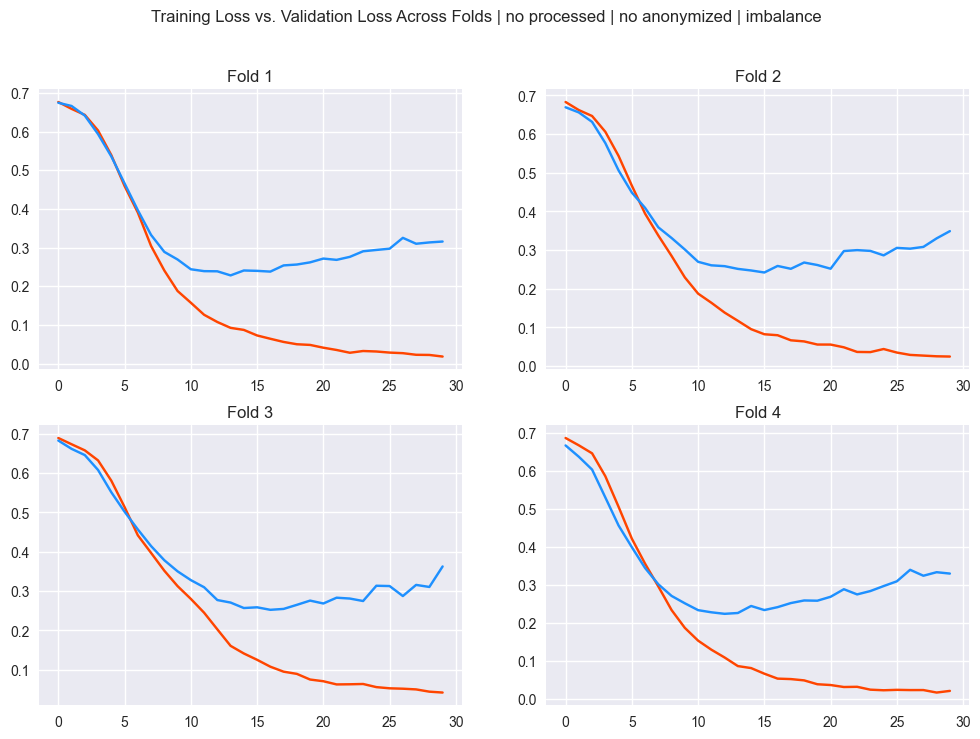

In [10]:
plotter.plot_subplots_curve(all_losses_1, all_val_losses_1, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | imbalance ")

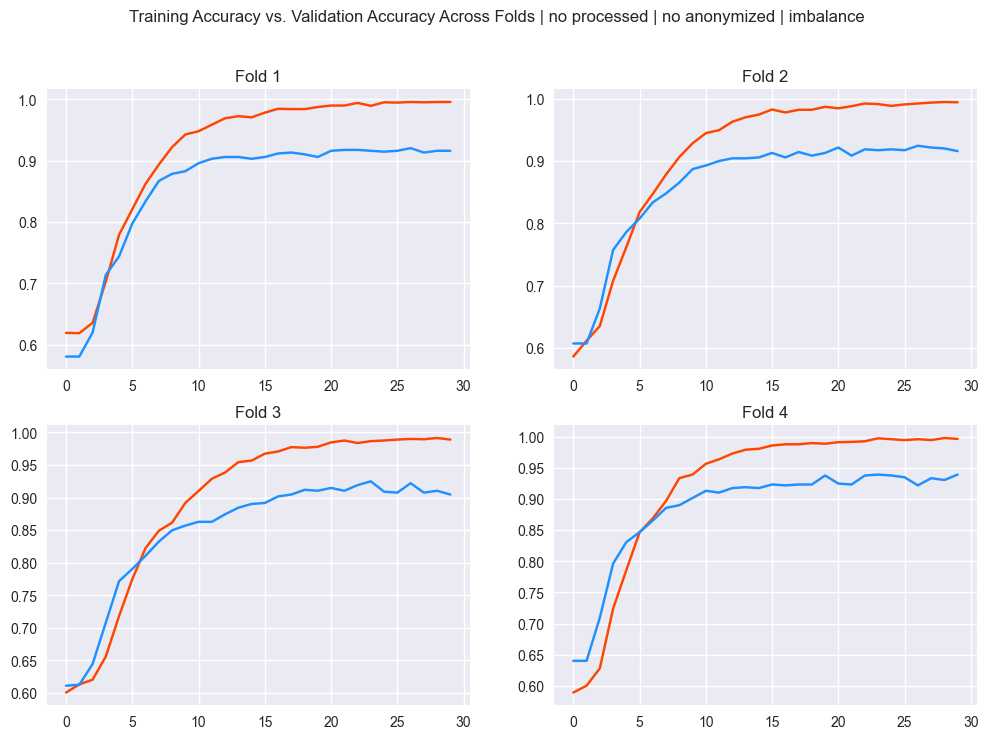

In [11]:
plotter.plot_subplots_curve(all_accuracies_1, all_val_accuracies_1, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | imbalance")

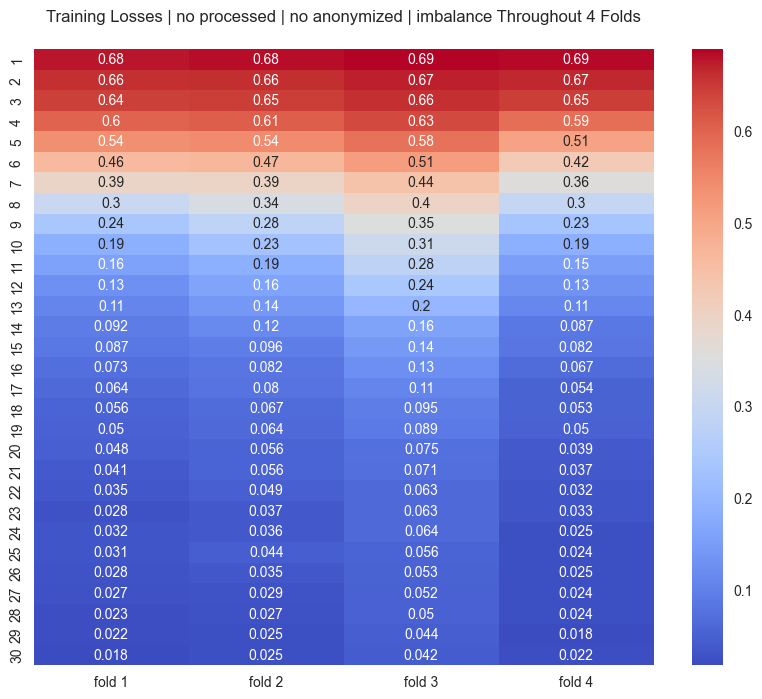

In [12]:
plotter.plot_heatmap(all_losses_1, "Training Losses | no processed | no anonymized | imbalance")

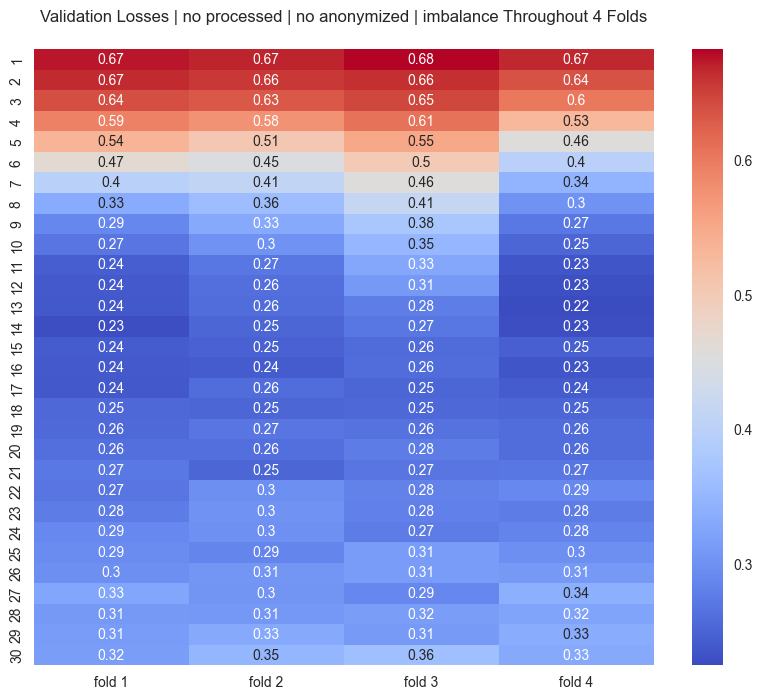

In [13]:
plotter.plot_heatmap(all_val_losses_1, "Validation Losses | no processed | no anonymized | imbalance")

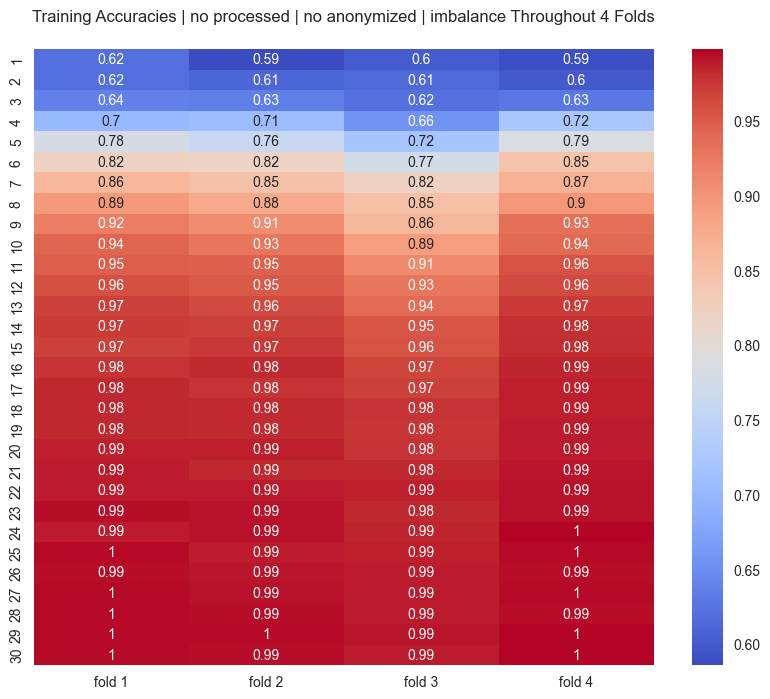

In [14]:
plotter.plot_heatmap(all_accuracies_1, "Training Accuracies | no processed | no anonymized | imbalance")

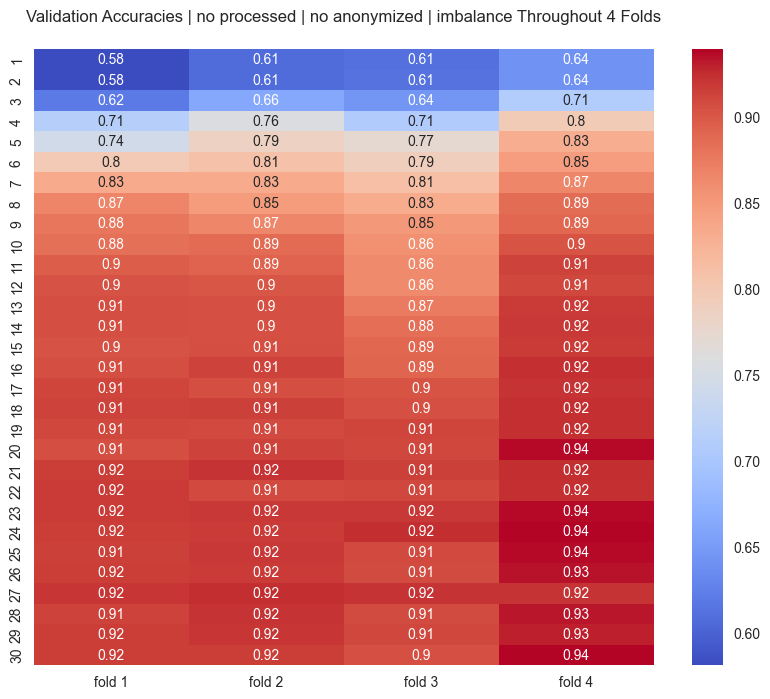

In [15]:
plotter.plot_heatmap(all_val_accuracies_1, "Validation Accuracies | no processed | no anonymized | imbalance")

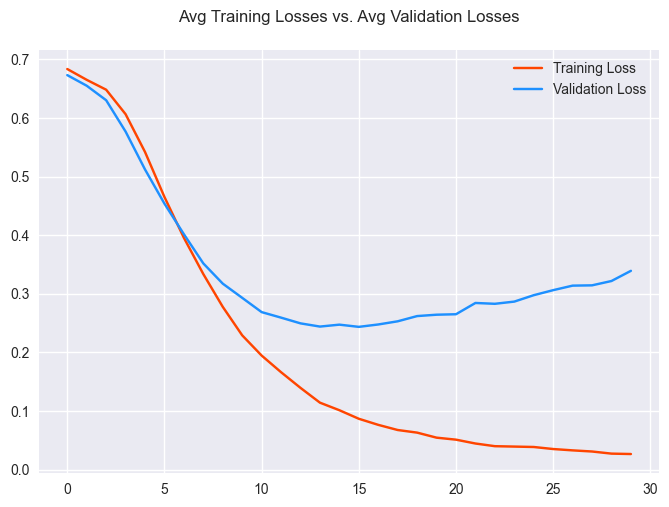

In [16]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_1, avg_val_loss_hist_1, "Training Loss", "Validation Loss")

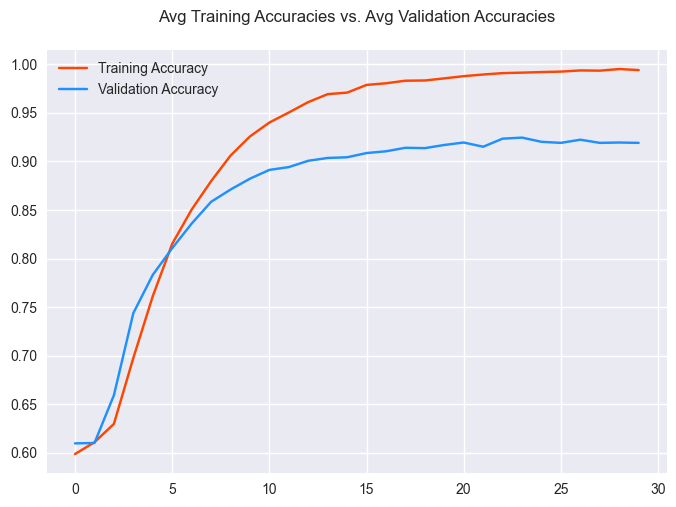

In [17]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_1, avg_val_acc_hist_1, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 3ms/step


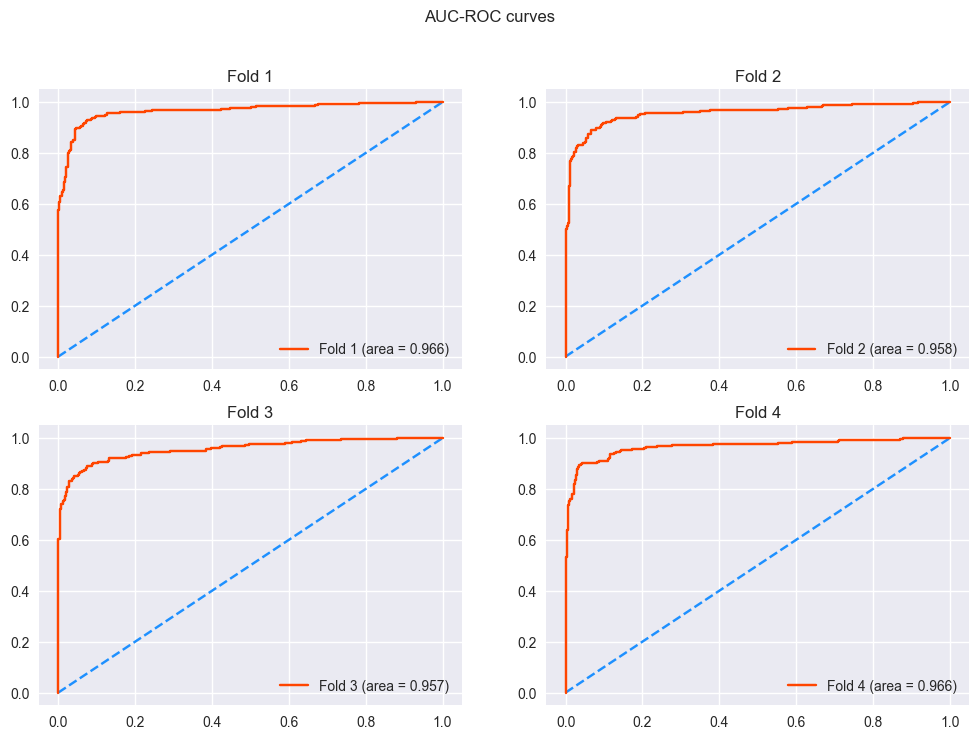

In [18]:
plotter.plot_roc_curve(all_models_1, X_test_vectors_1, y_test)

22/22 [==============================] - 0s 3ms/step


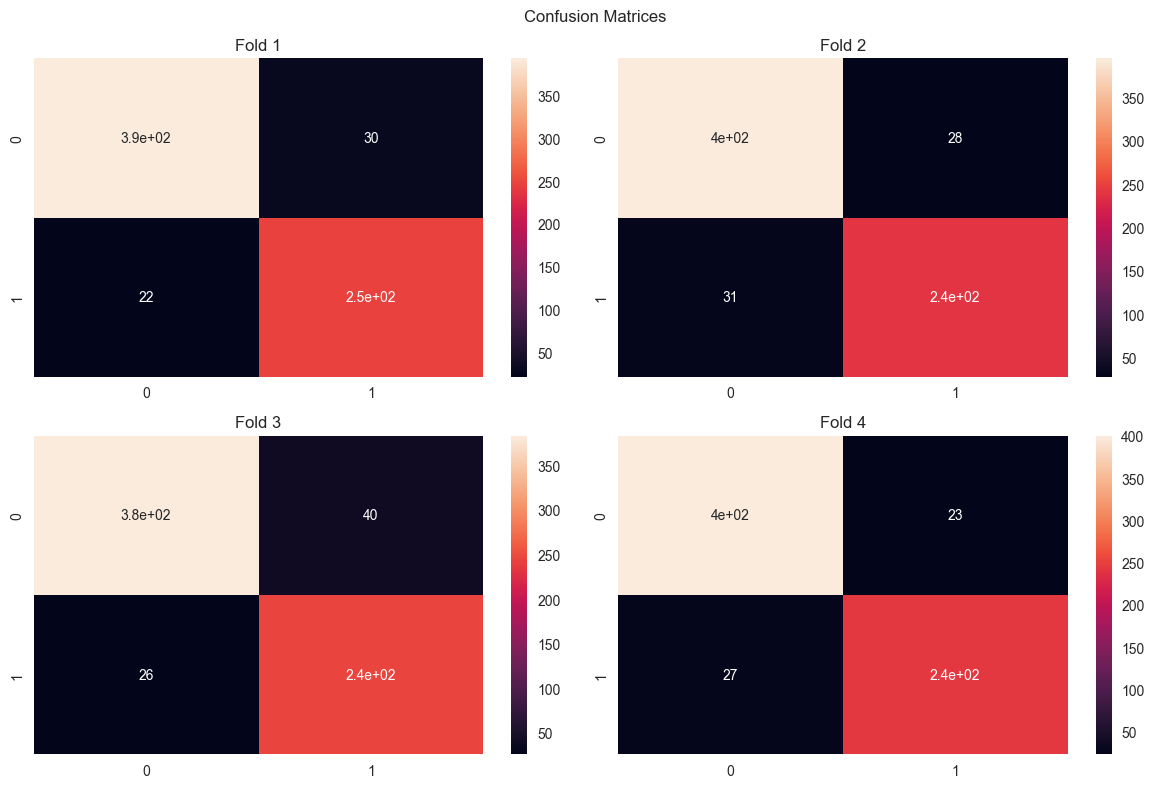

In [19]:
plotter.plot_confusion_matrix(all_models_1, X_test_vectors_1, y_test)

In [20]:
for i, trained_model in enumerate(all_models_1):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_1, y_test))

Model 1:
22/22 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       423
           1       0.89      0.92      0.91       270

    accuracy                           0.92       693
   macro avg       0.92      0.92      0.92       693
weighted avg       0.93      0.92      0.93       693

Model 2:
22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.90      0.89      0.89       270

    accuracy                           0.91       693
   macro avg       0.91      0.91      0.91       693
weighted avg       0.91      0.91      0.91       693

Model 3:
22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       423
           1       0.86      0.90      0.88       2

In [21]:
print_testing_loss_accuracy(all_models_1, X_test_vectors_1, y_test)

model: 1
22/22 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.9250
model: 2
22/22 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.9149
model: 3
22/22 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.9048
model: 4
22/22 [==============================] - 0s 3ms/step - loss: 0.2841 - accuracy: 0.9278
average testing loss: 0.303
average testing accuracy: 0.918


### Combination 2: (No Processing - No Anonymization - Balancing)

In [22]:
balanced_df = preprocessor.balance_data(X_train["Facts"], y_train)
X_train_balanced = balanced_df["Facts"]
y_train_balanced = balanced_df["winner_index"]

In [23]:
text_vectorizer_2, X_train_vectors_2 = preprocessor.convert_text_to_vectors_cnn(
    X_train_balanced)

In [24]:
X_test_vectors_2 = preprocessor.convert_text_to_vectors_cnn(
    X_test["Facts"], train=False, text_vectorizer=text_vectorizer_2)

In [25]:
all_models_2, all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2 = train_model(build_cnn_model, X_train_vectors_2, y_train_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 2s 27ms/step - loss: 0.6905 - accuracy: 0.5530 - val_loss: 0.6837 - val_accuracy: 0.6509
Epoch 2/30
40/40 [==============================] - 1s 22ms/step - loss: 0.6668 - accuracy: 0.6409 - val_loss: 0.6315 - val_accuracy: 0.7302
Epoch 3/30
40/40 [==============================] - 1s 21ms/step - loss: 0.5913 - accuracy: 0.7241 - val_loss: 0.5254 - val_accuracy: 0.7870
Epoch 4/30
40/40 [==============================] - 1s 23ms/step - loss: 0.4814 - accuracy: 0.8025 - val_loss: 0.4320 - val_accuracy: 0.8178
Epoch 5/30
40/40 [==============================] - 1s 21ms/step - loss: 0.3827 - accuracy: 0.8498 - val_loss: 0.3497 - val_accuracy: 0.8592
Epoch 6/30
40/40 [==============================] - 1s 19ms/step - loss: 0.2928 - accuracy: 0.8995 - val_loss: 0.2822 - val_accuracy: 0.8781
Epoch 7/30
40/40 [==============================] - 1s 19ms/step - loss: 0.2262 - accuracy: 0.9251 - val_loss: 0.2445 - val_accuracy: 0.9041
Epoch

In [26]:
avg_loss_hist_2, avg_val_loss_hist_2, avg_acc_hist_2, avg_val_acc_hist_2 = calculate_average_measures(all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2)

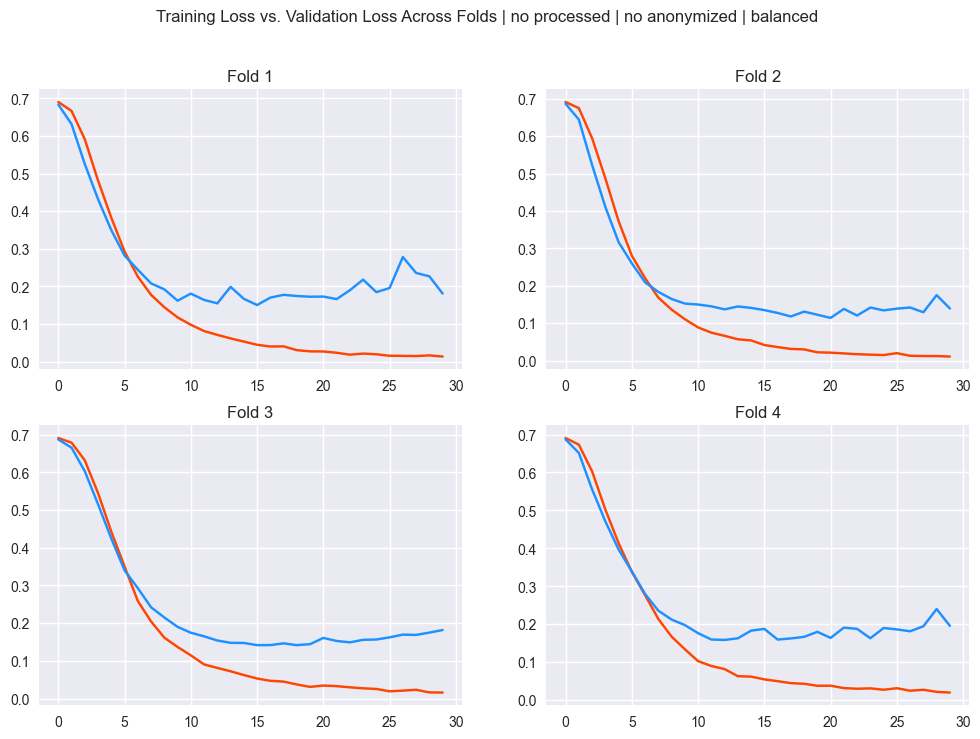

In [27]:
plotter.plot_subplots_curve(all_losses_2, all_val_losses_2, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | balanced ")

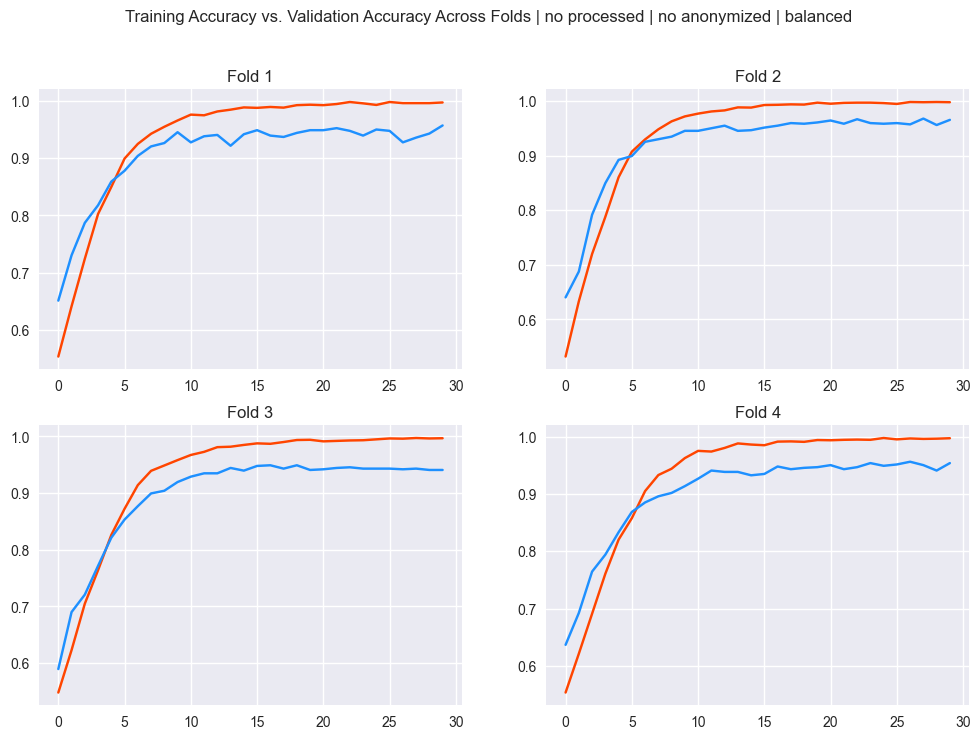

In [28]:
plotter.plot_subplots_curve(all_accuracies_2, all_val_accuracies_2, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | balanced")

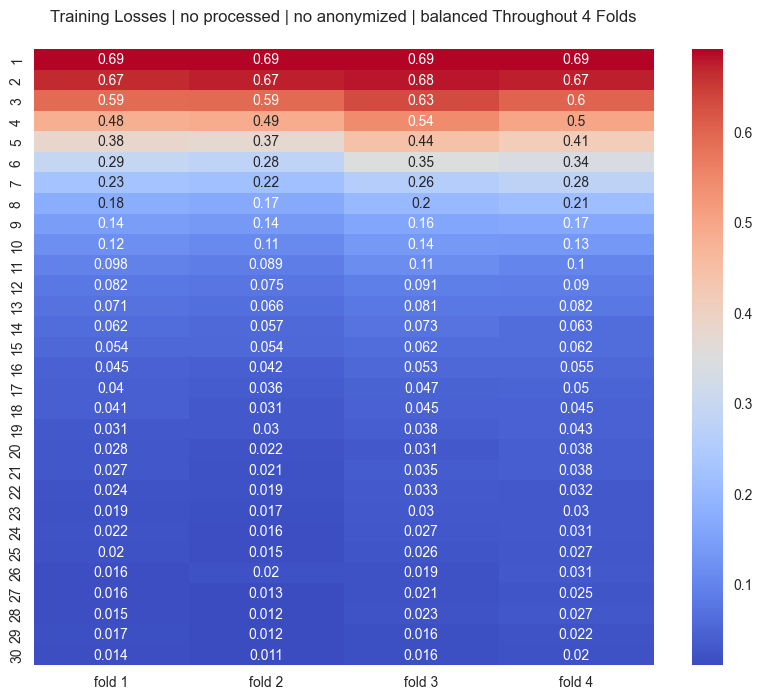

In [29]:
plotter.plot_heatmap(all_losses_2, "Training Losses | no processed | no anonymized | balanced")

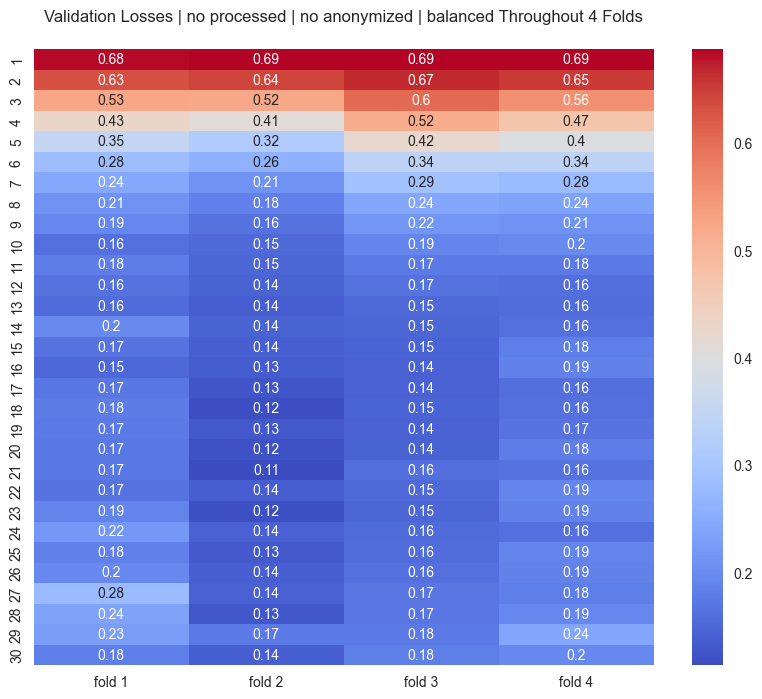

In [30]:
plotter.plot_heatmap(all_val_losses_2, "Validation Losses | no processed | no anonymized | balanced")

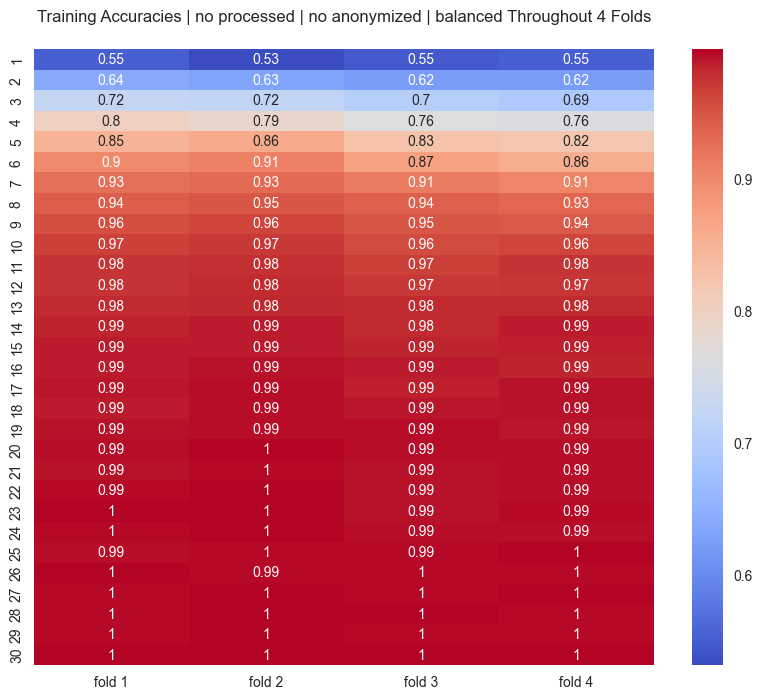

In [31]:
plotter.plot_heatmap(all_accuracies_2, "Training Accuracies | no processed | no anonymized | balanced")

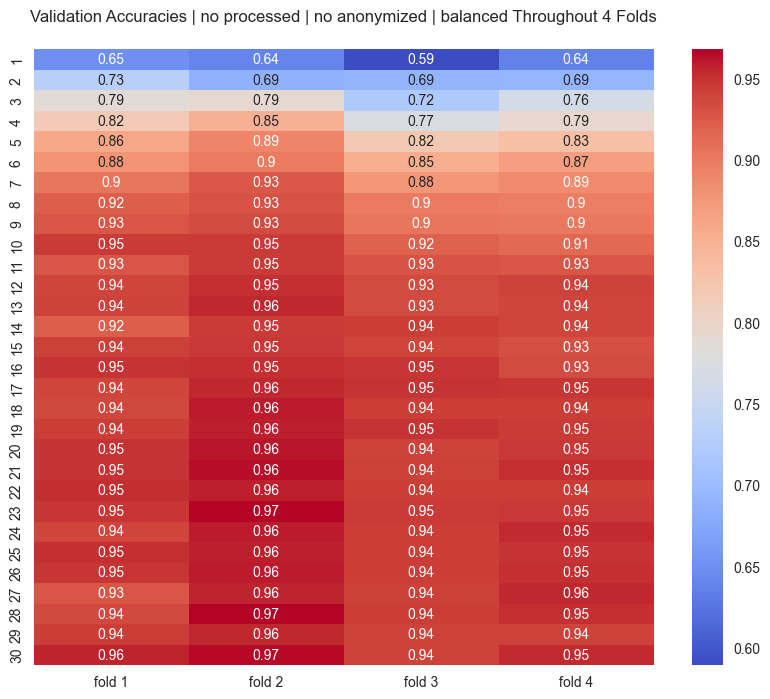

In [32]:
plotter.plot_heatmap(all_val_accuracies_2, "Validation Accuracies | no processed | no anonymized | balanced")

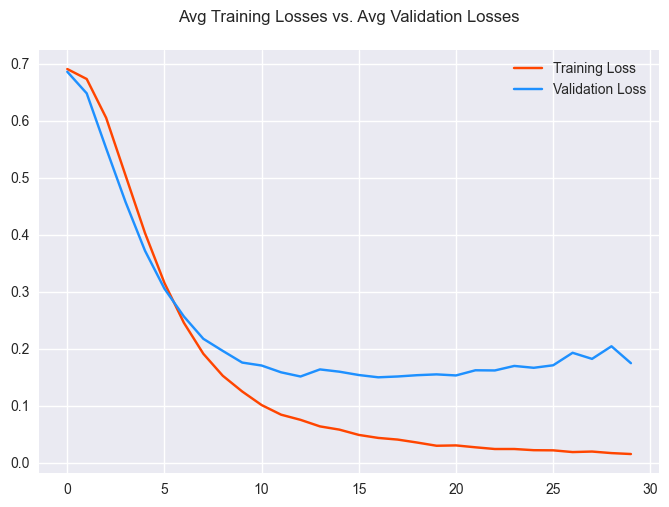

In [33]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_2, avg_val_loss_hist_2, "Training Loss", "Validation Loss")

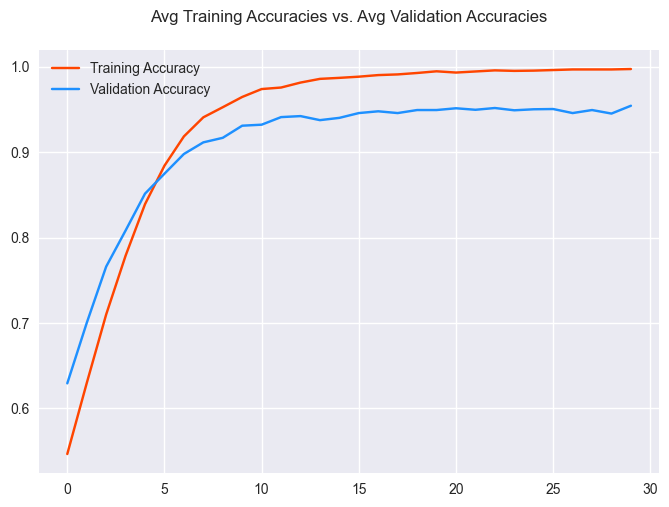

In [34]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_2, avg_val_acc_hist_2, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 3ms/step


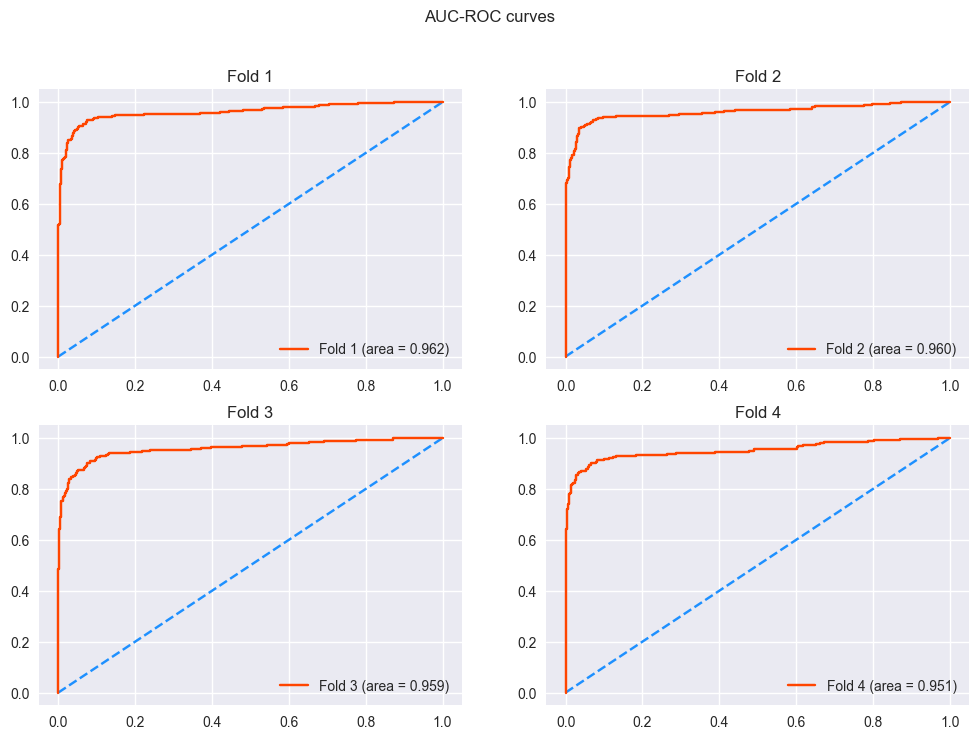

In [35]:
plotter.plot_roc_curve(all_models_2, X_test_vectors_2, y_test)

22/22 [==============================] - 0s 6ms/step


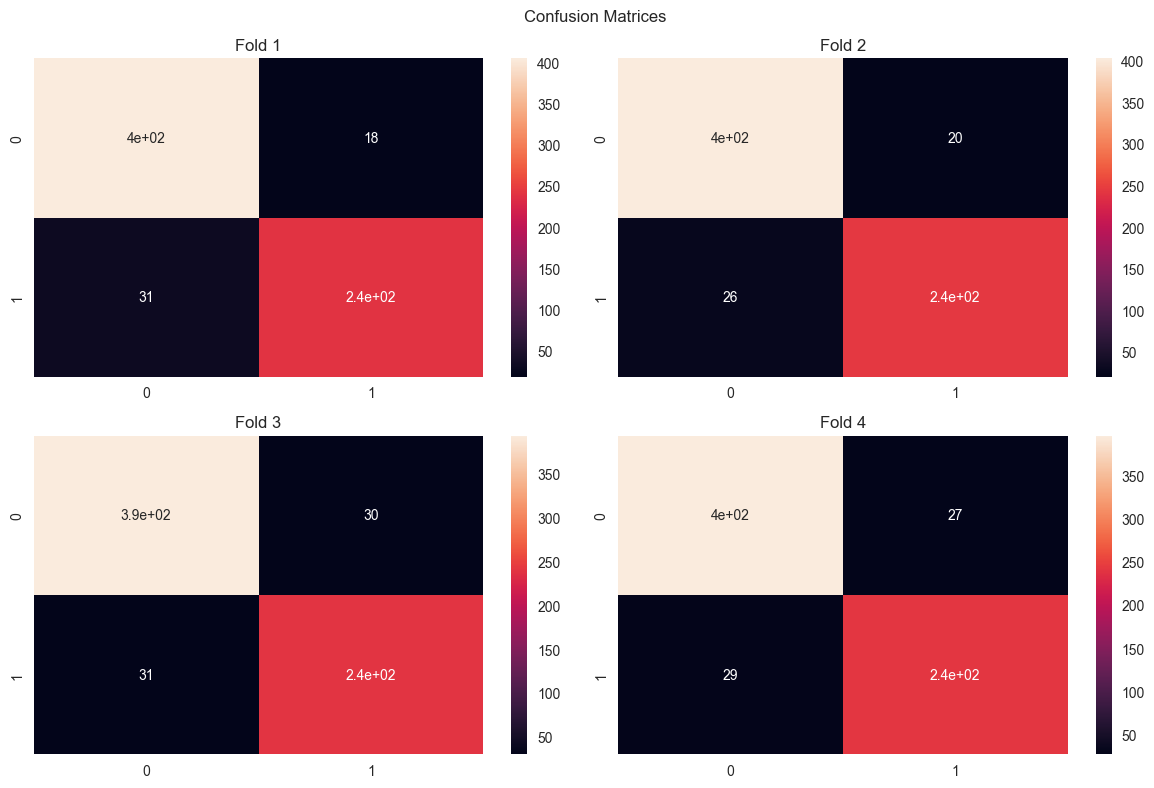

In [36]:
plotter.plot_confusion_matrix(all_models_2, X_test_vectors_2, y_test)

In [37]:
for i, trained_model in enumerate(all_models_2):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_2, y_test))

Model 1:
22/22 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       423
           1       0.93      0.89      0.91       270

    accuracy                           0.93       693
   macro avg       0.93      0.92      0.92       693
weighted avg       0.93      0.93      0.93       693

Model 2:
22/22 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       423
           1       0.92      0.90      0.91       270

    accuracy                           0.93       693
   macro avg       0.93      0.93      0.93       693
weighted avg       0.93      0.93      0.93       693

Model 3:
22/22 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.89      0.89      0.89       2

In [38]:
print_testing_loss_accuracy(all_models_2, X_test_vectors_2, y_test)

model: 1
22/22 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.9293
model: 2
22/22 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.9336
model: 3
22/22 [==============================] - 0s 4ms/step - loss: 0.3430 - accuracy: 0.9120
model: 4
22/22 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.9192
average testing loss: 0.334
average testing accuracy: 0.924


### Combination 3: (No Processing - Anonymization - Imbalancing)

In [39]:
first_party_names_3 = X_train["first_party"]
second_party_names_3 = X_train["second_party"]
facts_3 = X_train["Facts"]

In [40]:
test_first_party_names_3 = X_test["first_party"]
test_second_party_names_3 = X_test["second_party"]
test_facts_3 = X_test["Facts"]

In [41]:
anonymized_facts_3 = preprocessor.anonymize_data(first_party_names_3, second_party_names_3, facts_3)
test_anonymized_facts_3 = preprocessor.anonymize_data(test_first_party_names_3, test_second_party_names_3, test_facts_3)

In [42]:
text_vectorizer_3, X_train_vectors_3 = preprocessor.convert_text_to_vectors_cnn(anonymized_facts_3)

In [43]:
X_test_vectors_3 = preprocessor.convert_text_to_vectors_cnn(test_anonymized_facts_3, train=False, text_vectorizer=text_vectorizer_3)

In [44]:
all_models_3, all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3 = train_model(build_cnn_model, X_train_vectors_3, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 2s 32ms/step - loss: 0.6777 - accuracy: 0.6215 - val_loss: 0.6742 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 1s 20ms/step - loss: 0.6559 - accuracy: 0.6200 - val_loss: 0.6638 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 1s 20ms/step - loss: 0.6352 - accuracy: 0.6421 - val_loss: 0.6325 - val_accuracy: 0.6561
Epoch 4/30
33/33 [==============================] - 1s 20ms/step - loss: 0.6039 - accuracy: 0.7013 - val_loss: 0.5955 - val_accuracy: 0.7052
Epoch 5/30
33/33 [==============================] - 1s 20ms/step - loss: 0.5468 - accuracy: 0.7451 - val_loss: 0.5495 - val_accuracy: 0.7486
Epoch 6/30
33/33 [==============================] - 1s 21ms/step - loss: 0.4863 - accuracy: 0.7912 - val_loss: 0.4929 - val_accuracy: 0.7991
Epoch 7/30
33/33 [==============================] - 1s 20ms/step - loss: 0.4152 - accuracy: 0.8437 - val_loss: 0.4363 - val_accuracy: 0.8266
Epoch

In [45]:
avg_loss_hist_3, avg_val_loss_hist_3, avg_acc_hist_3, avg_val_acc_hist_3 = calculate_average_measures(all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3)

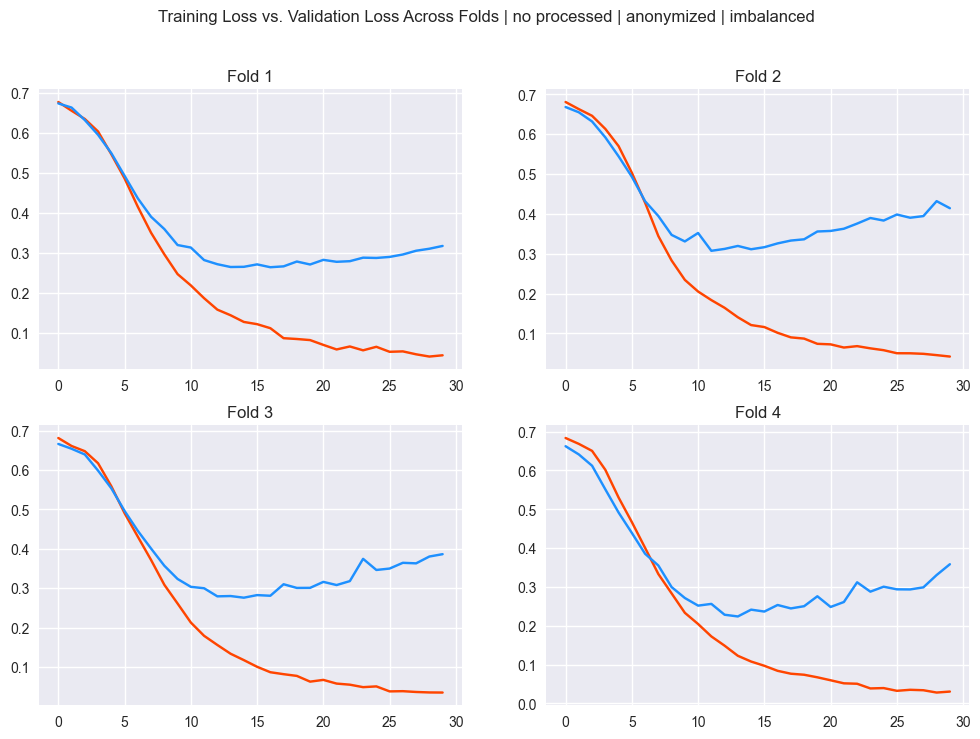

In [46]:
plotter.plot_subplots_curve(all_losses_3, all_val_losses_3, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | imbalanced ")

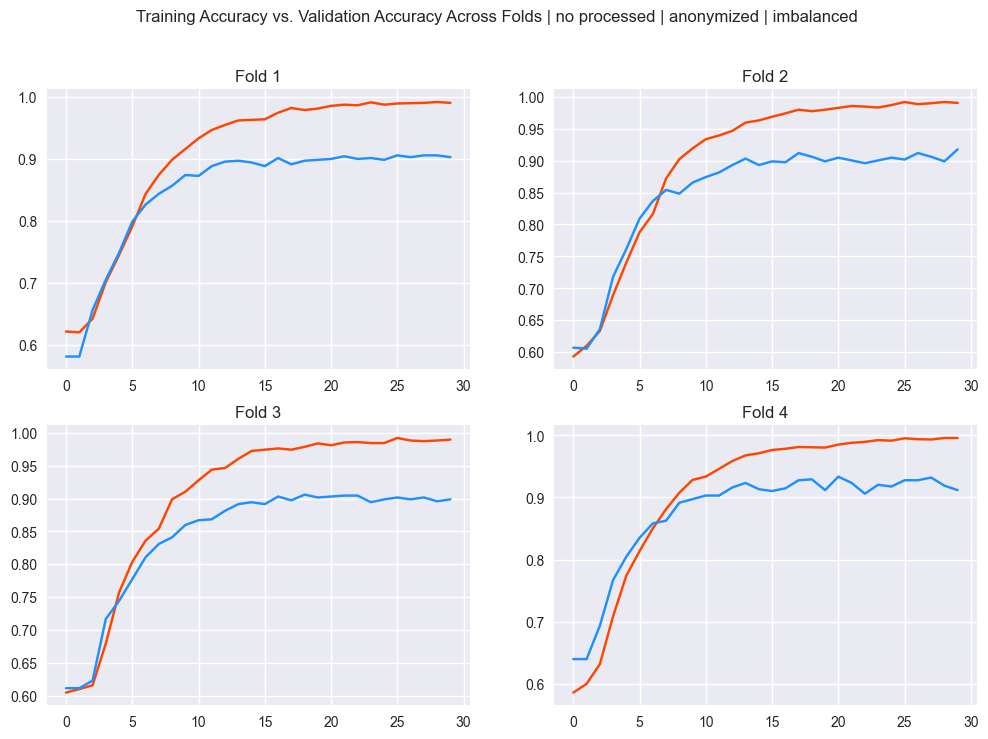

In [47]:
plotter.plot_subplots_curve(all_accuracies_3, all_val_accuracies_3, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | imbalanced")

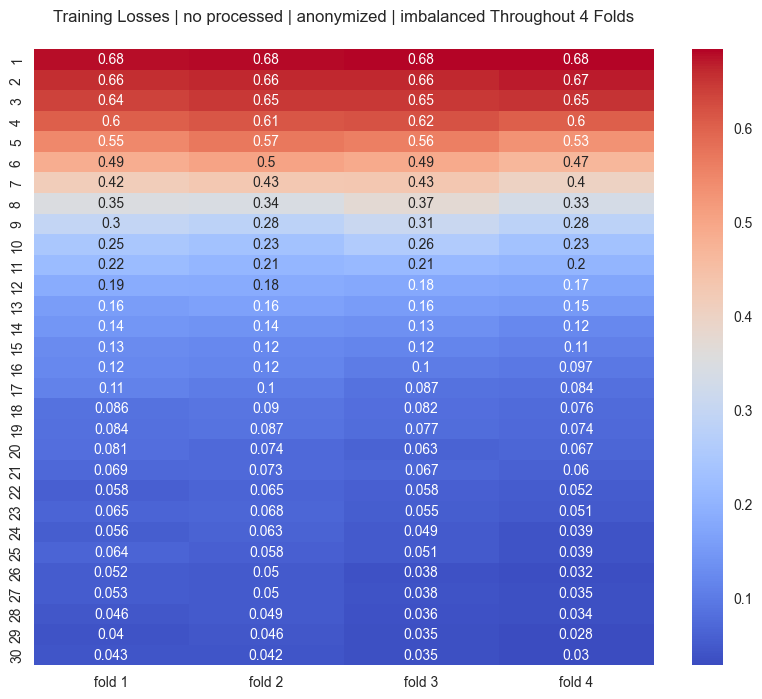

In [48]:
plotter.plot_heatmap(all_losses_3, "Training Losses | no processed | anonymized | imbalanced")

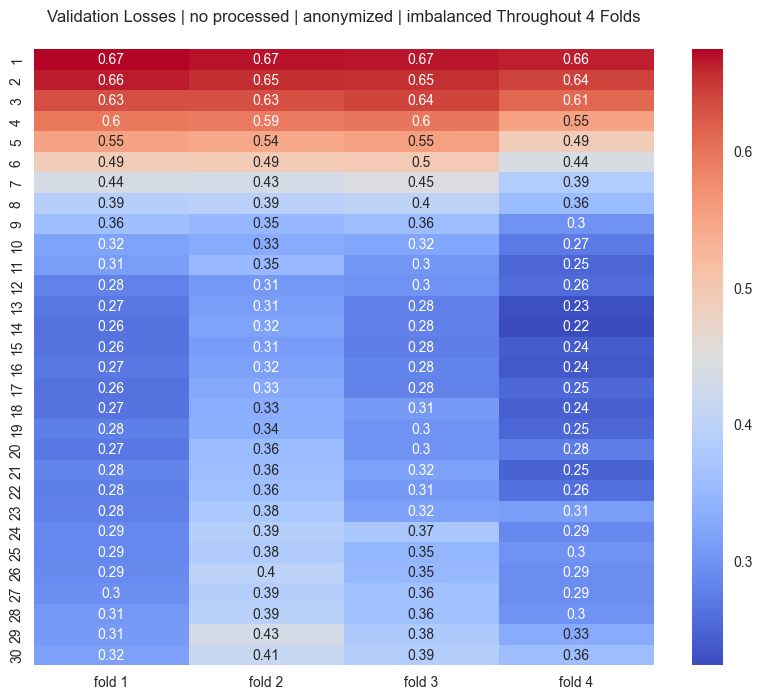

In [49]:
plotter.plot_heatmap(all_val_losses_3, "Validation Losses | no processed | anonymized | imbalanced")

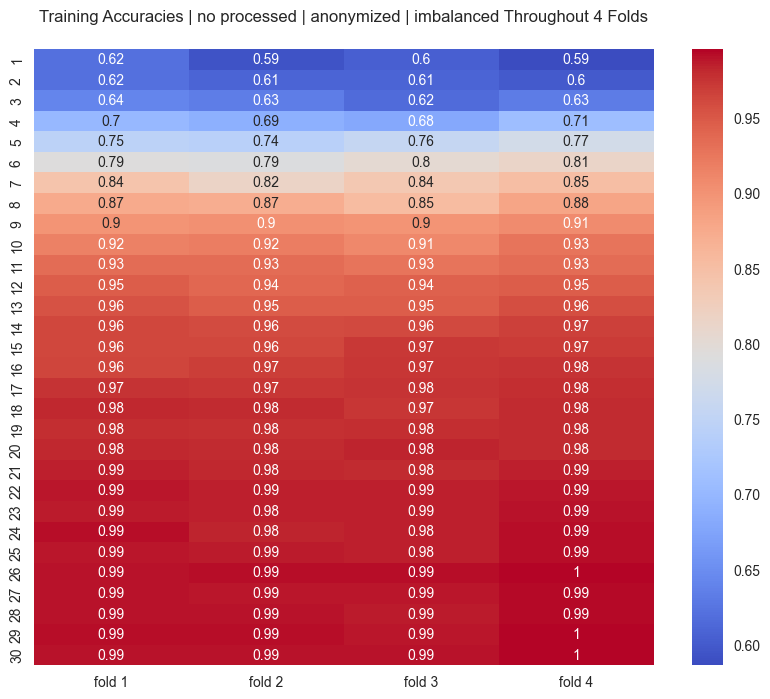

In [50]:
plotter.plot_heatmap(all_accuracies_3, "Training Accuracies | no processed | anonymized | imbalanced")

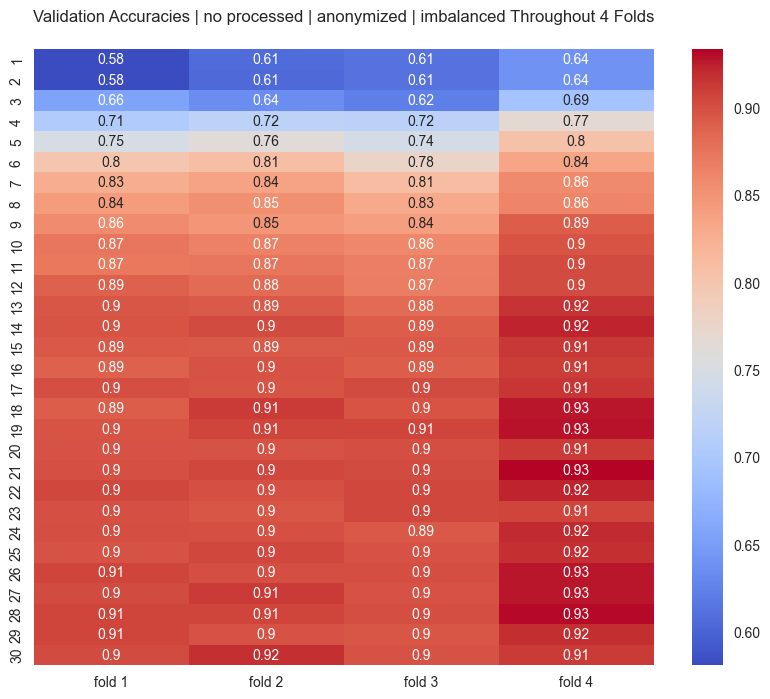

In [51]:
plotter.plot_heatmap(all_val_accuracies_3, "Validation Accuracies | no processed | anonymized | imbalanced")

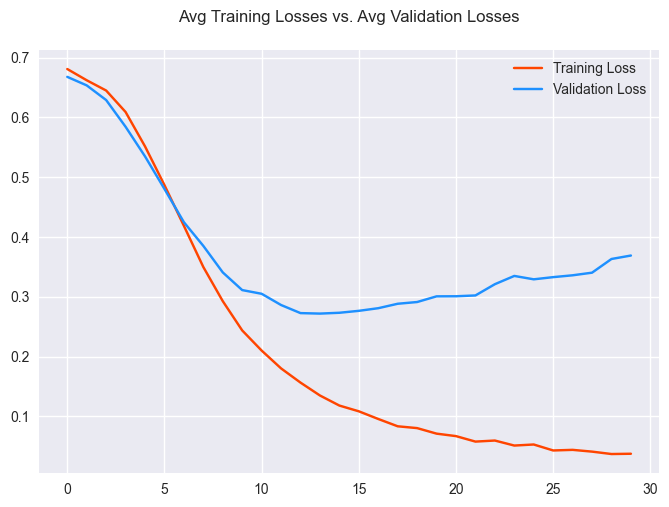

In [52]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_3, avg_val_loss_hist_3, "Training Loss", "Validation Loss")

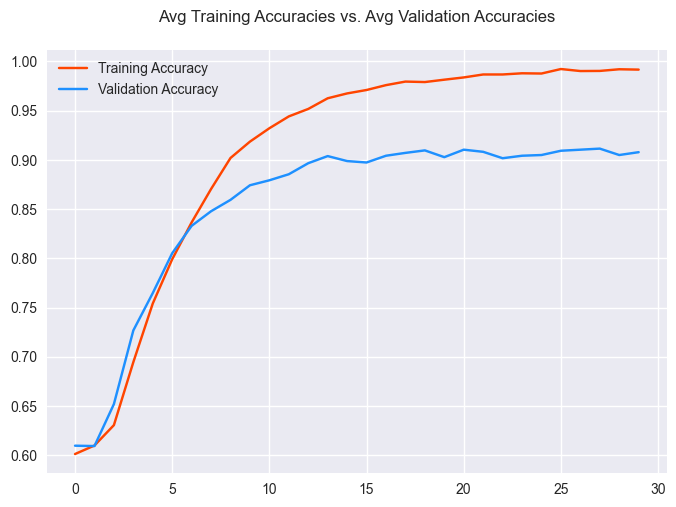

In [53]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_3, avg_val_acc_hist_3, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 3ms/step


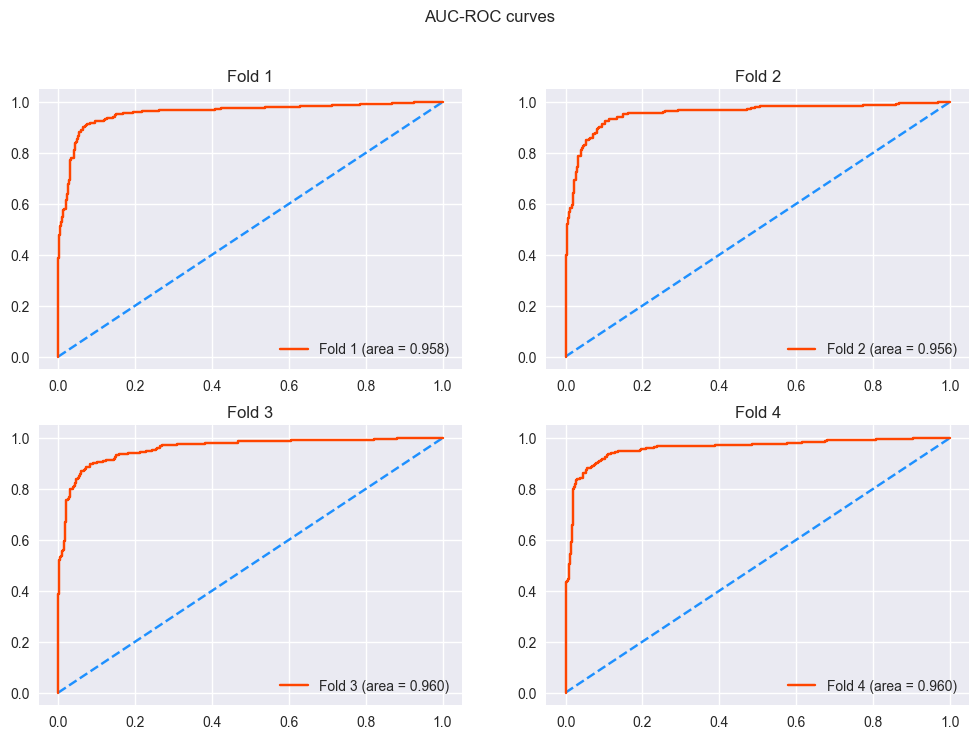

In [54]:
plotter.plot_roc_curve(all_models_3, X_test_vectors_3, y_test)

22/22 [==============================] - 0s 3ms/step


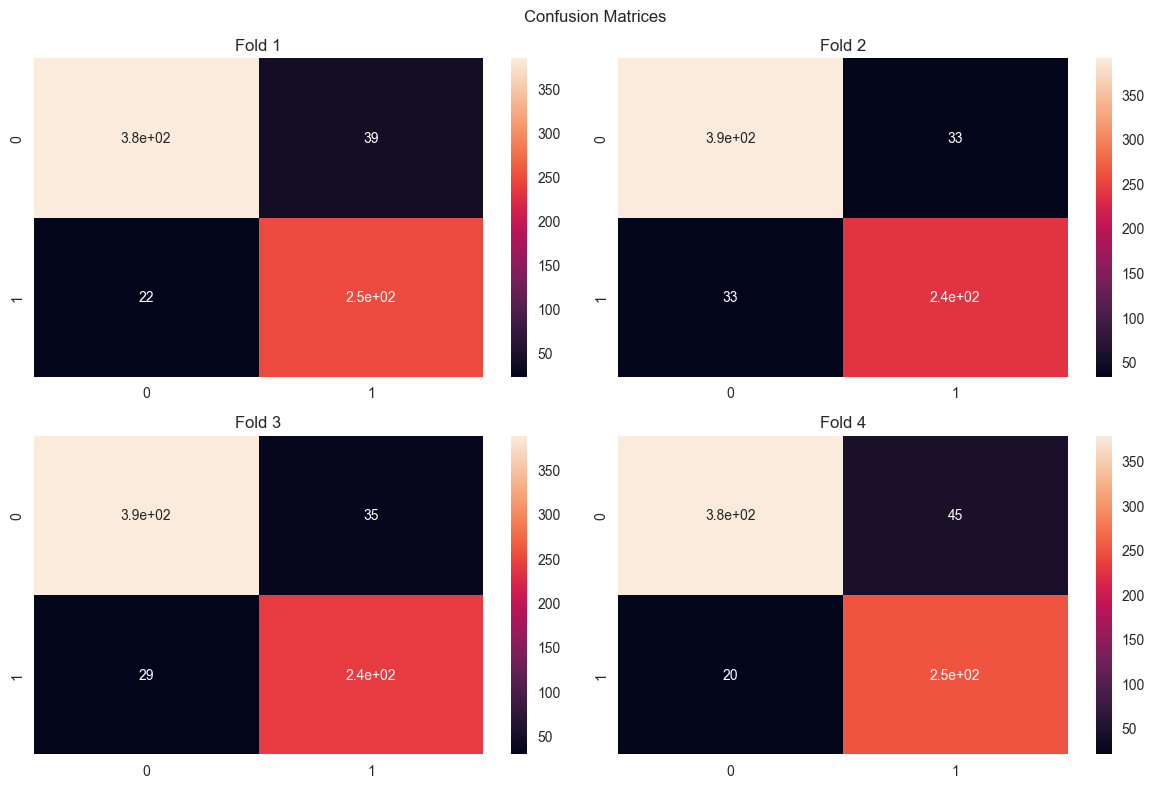

In [55]:
plotter.plot_confusion_matrix(all_models_3, X_test_vectors_3, y_test)

In [56]:
for i, trained_model in enumerate(all_models_3):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_3, y_test))

Model 1:
22/22 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       423
           1       0.86      0.92      0.89       270

    accuracy                           0.91       693
   macro avg       0.90      0.91      0.91       693
weighted avg       0.91      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       423
           1       0.88      0.88      0.88       270

    accuracy                           0.90       693
   macro avg       0.90      0.90      0.90       693
weighted avg       0.90      0.90      0.90       693

Model 3:
22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       423
           1       0.87      0.89      0.88       2

In [57]:
print_testing_loss_accuracy(all_models_3, X_test_vectors_3, y_test)

model: 1
22/22 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.9120
model: 2
22/22 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.9048
model: 3
22/22 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.9076
model: 4
22/22 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.9062
average testing loss: 0.327
average testing accuracy: 0.908


### Combination 4: (No Processing - Anonymization - Balancing)

In [58]:
first_party_names_4 = X_train["first_party"]
second_party_names_4 = X_train["second_party"]
facts_4 = X_train["Facts"]

In [59]:
test_first_party_names_4 = X_test["first_party"]
test_second_party_names_4 = X_test["second_party"]
test_facts_4 = X_test["Facts"]

In [60]:
anonymized_facts_4 = preprocessor.anonymize_data(first_party_names_4, second_party_names_4, facts_4)
test_anonymized_facts_4 = preprocessor.anonymize_data(test_first_party_names_4, test_second_party_names_4, test_facts_4)

In [61]:
balanced_anonymized_df = preprocessor.balance_data(anonymized_facts_4, y_train)
balanced_anonymized_df = balanced_anonymized_df.rename(columns={0: "Facts"})
balanced_anonymized_df.head()

Facts  winner_index
389   P _PARTY_ itioners _PARTY_ and his wife were c...             1
2571  Under the _P _PARTY_ RTY_ oreign Trade _PARTY_...             0
466   In 2006, _PARTY_ accepted a probationary posit...             1
763   In 2010, Congress passed the Affordable Care A...             1
254   As part of Ohio's capit _PARTY_ development pl...             1

In [62]:
X_train_balanced_anonymized = balanced_anonymized_df["Facts"]
y_train_balanced_anonymized = balanced_anonymized_df["winner_index"]

In [63]:
text_vectorizer_4, X_train_vectors_4 = preprocessor.convert_text_to_vectors_cnn(X_train_balanced_anonymized)

In [64]:
X_test_vectors_4 = preprocessor.convert_text_to_vectors_cnn(test_anonymized_facts_4, train=False, text_vectorizer=text_vectorizer_4)

In [65]:
all_models_4, all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4 = train_model(build_cnn_model, X_train_vectors_4, y_train_balanced_anonymized)

fold: 1
Epoch 1/30
40/40 [==============================] - 2s 31ms/step - loss: 0.6911 - accuracy: 0.5345 - val_loss: 0.6885 - val_accuracy: 0.5692
Epoch 2/30
40/40 [==============================] - 1s 25ms/step - loss: 0.6812 - accuracy: 0.6039 - val_loss: 0.6703 - val_accuracy: 0.6059
Epoch 3/30
40/40 [==============================] - 1s 27ms/step - loss: 0.6466 - accuracy: 0.6874 - val_loss: 0.6217 - val_accuracy: 0.7207
Epoch 4/30
40/40 [==============================] - 1s 30ms/step - loss: 0.5713 - accuracy: 0.7493 - val_loss: 0.5365 - val_accuracy: 0.7740
Epoch 5/30
40/40 [==============================] - 1s 26ms/step - loss: 0.4731 - accuracy: 0.8104 - val_loss: 0.4406 - val_accuracy: 0.8071
Epoch 6/30
40/40 [==============================] - 1s 25ms/step - loss: 0.3729 - accuracy: 0.8683 - val_loss: 0.3530 - val_accuracy: 0.8473
Epoch 7/30
40/40 [==============================] - 1s 22ms/step - loss: 0.2883 - accuracy: 0.8979 - val_loss: 0.2835 - val_accuracy: 0.8888
Epoch

In [66]:
avg_loss_hist_4, avg_val_loss_hist_4, avg_acc_hist_4, avg_val_acc_hist_4 = calculate_average_measures(all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4)

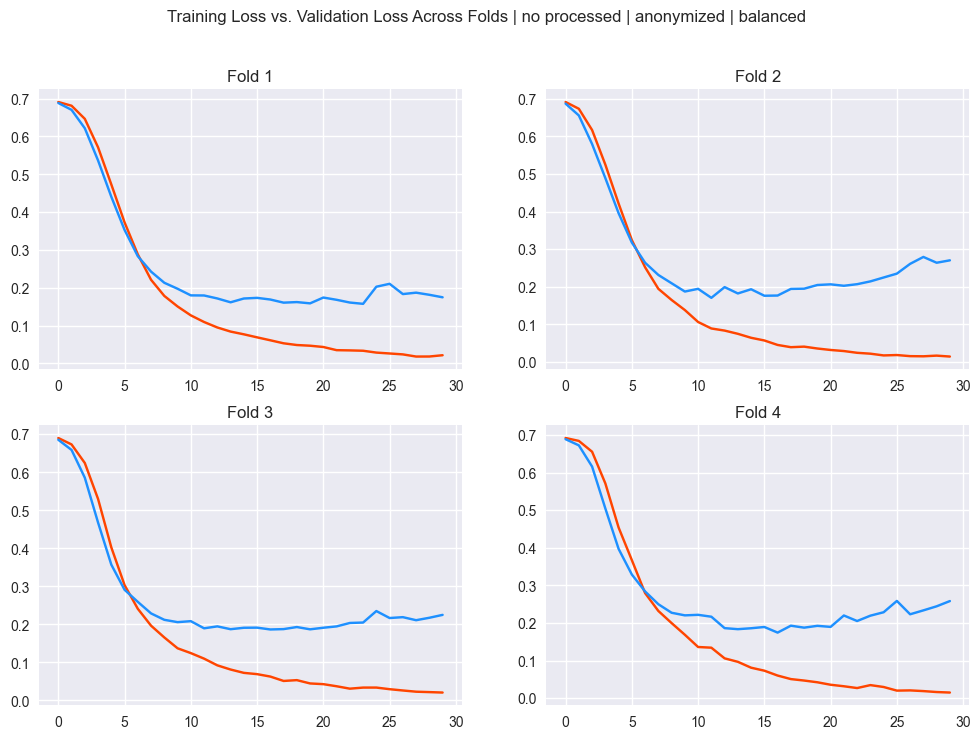

In [67]:
plotter.plot_subplots_curve(all_losses_4, all_val_losses_4, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | balanced ")

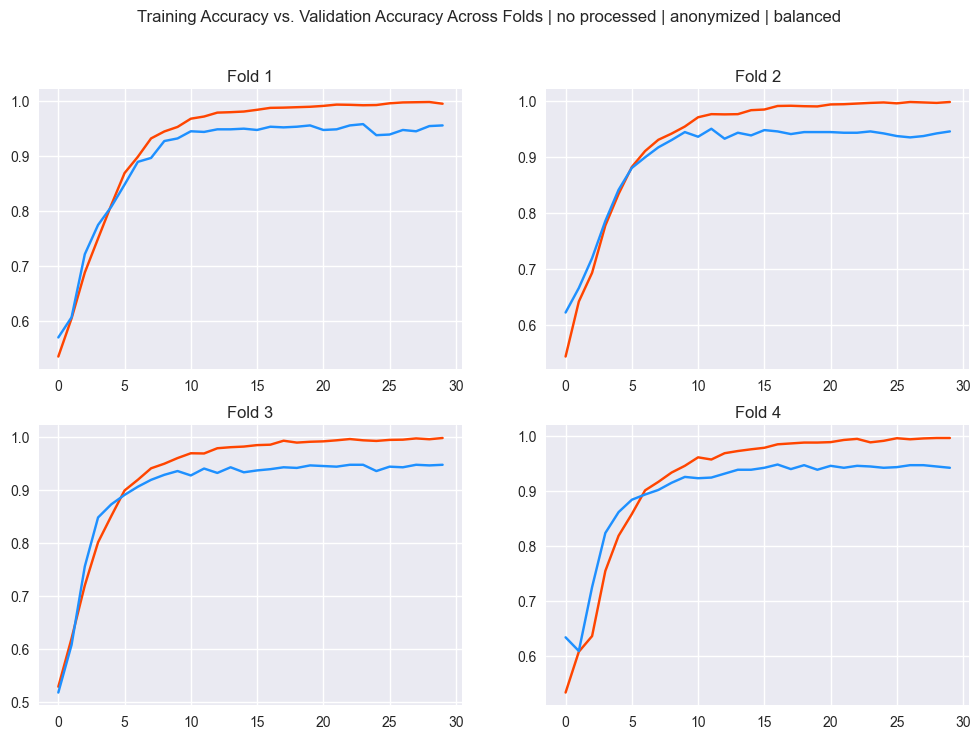

In [68]:
plotter.plot_subplots_curve(all_accuracies_4, all_val_accuracies_4, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | balanced")

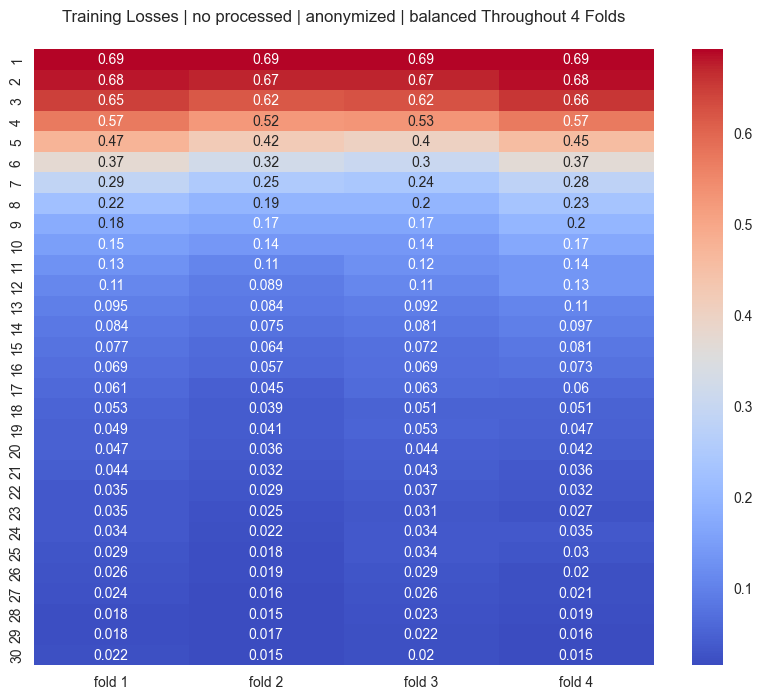

In [69]:
plotter.plot_heatmap(all_losses_4, "Training Losses | no processed | anonymized | balanced")

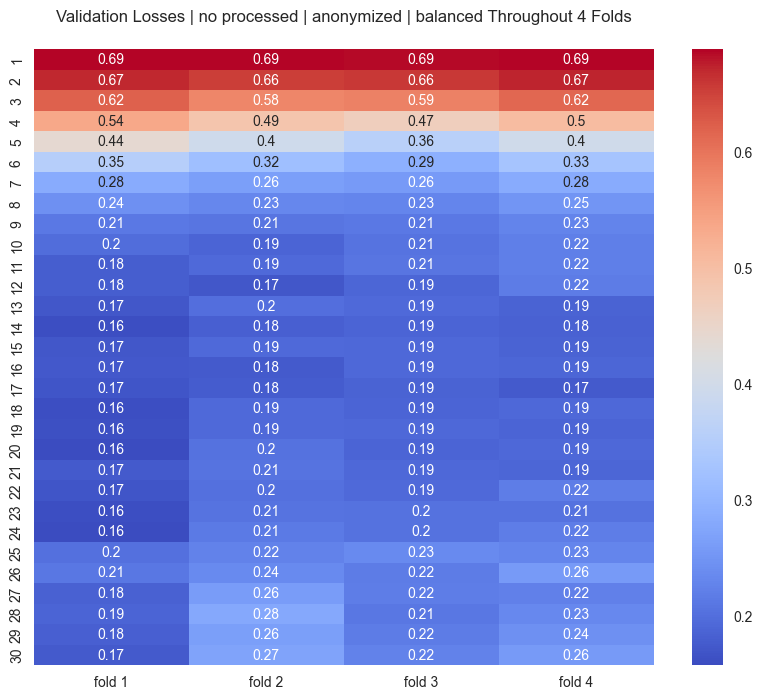

In [70]:
plotter.plot_heatmap(all_val_losses_4, "Validation Losses | no processed | anonymized | balanced")

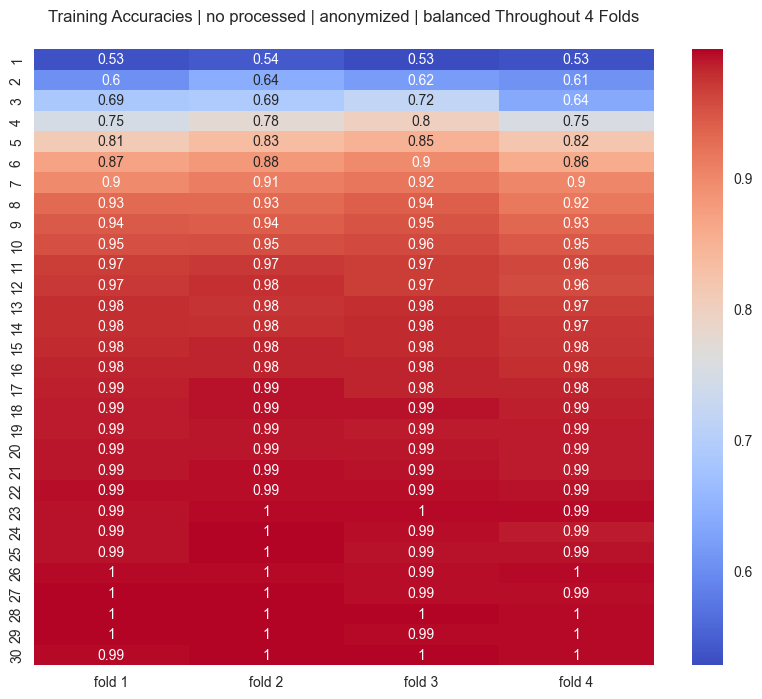

In [71]:
plotter.plot_heatmap(all_accuracies_4, "Training Accuracies | no processed | anonymized | balanced")

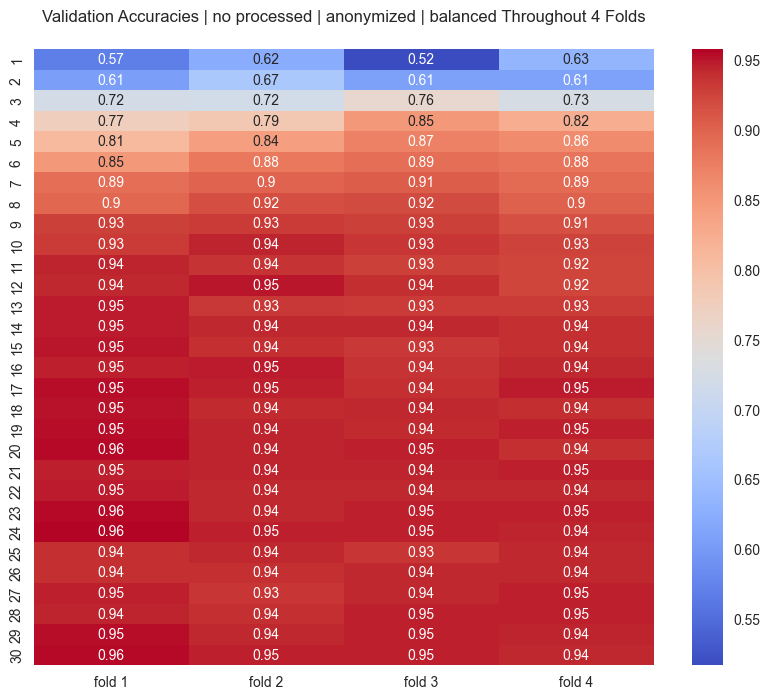

In [72]:
plotter.plot_heatmap(all_val_accuracies_4, "Validation Accuracies | no processed | anonymized | balanced")

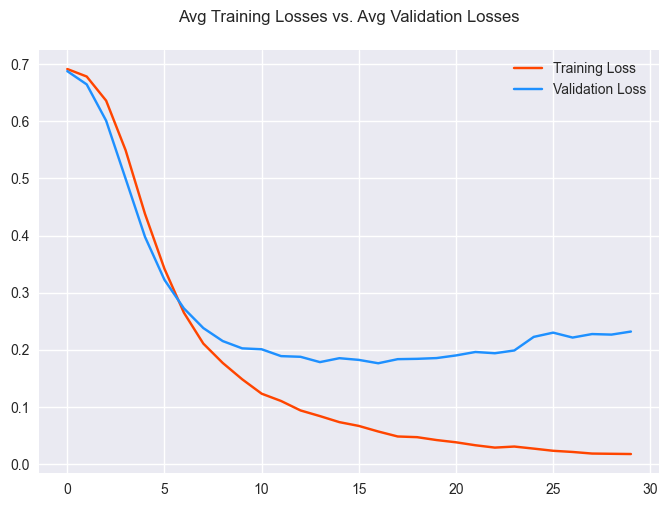

In [73]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_4, avg_val_loss_hist_4, "Training Loss", "Validation Loss")

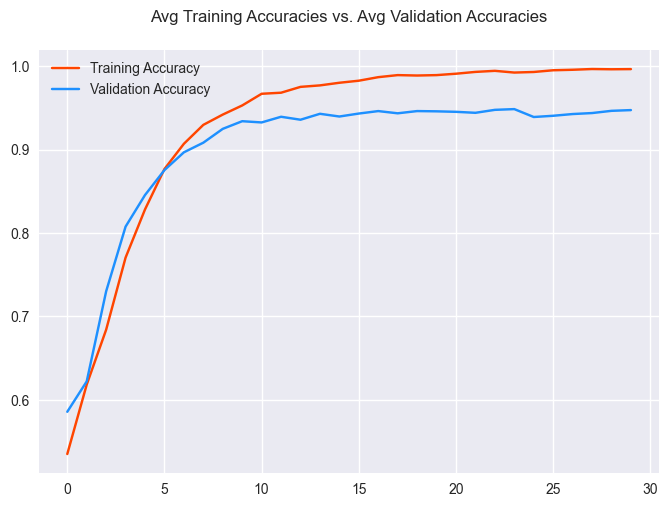

In [74]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_4, avg_val_acc_hist_4, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 13ms/step


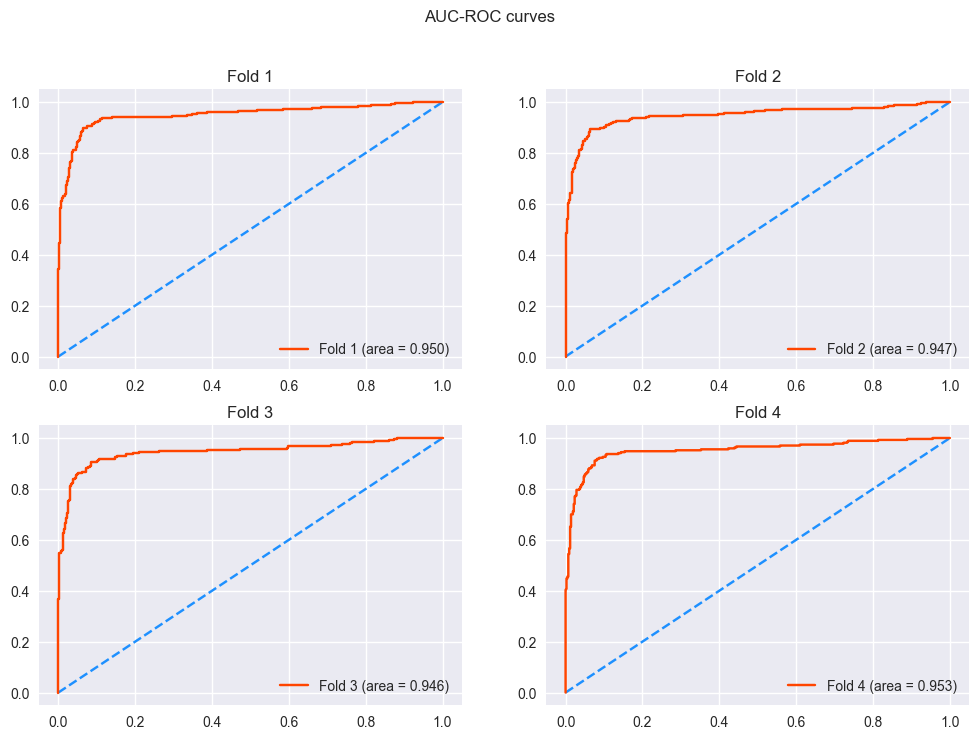

In [75]:
plotter.plot_roc_curve(all_models_4, X_test_vectors_4, y_test)

22/22 [==============================] - 0s 13ms/step


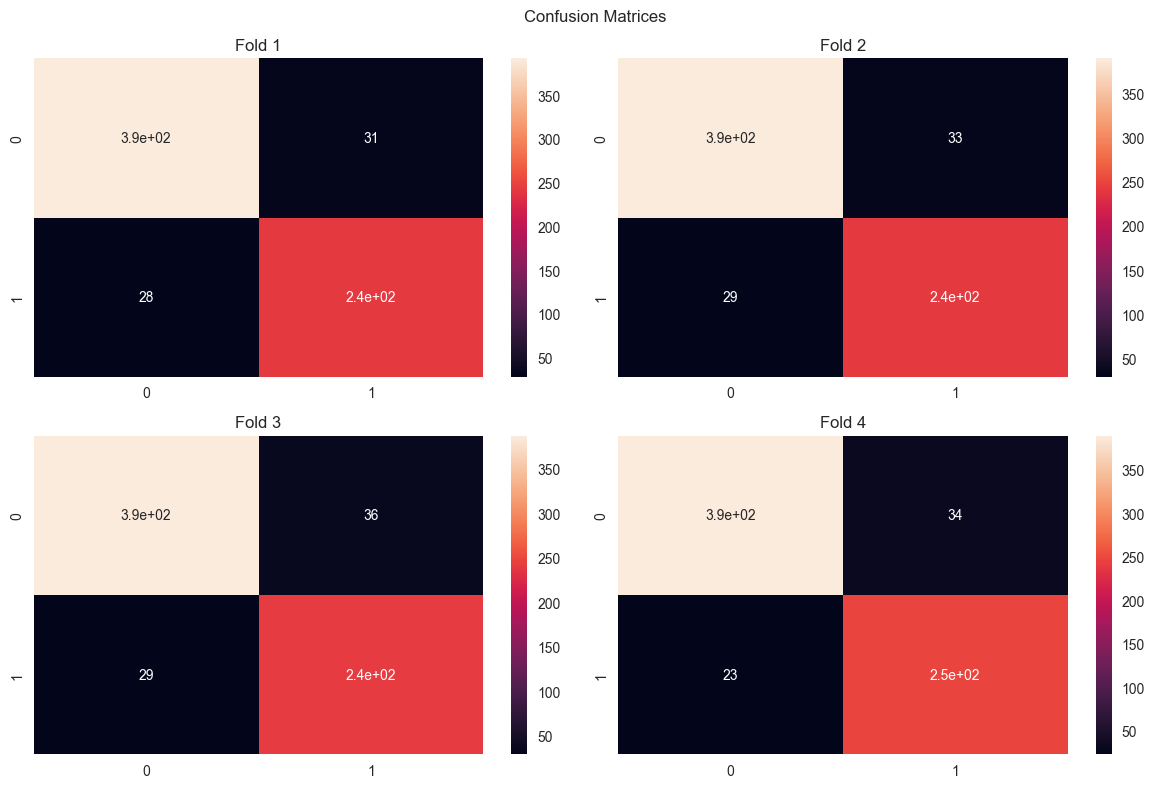

In [76]:
plotter.plot_confusion_matrix(all_models_4, X_test_vectors_4, y_test)

In [77]:
for i, trained_model in enumerate(all_models_4):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_4, y_test))

Model 1:
22/22 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.89      0.90      0.89       270

    accuracy                           0.91       693
   macro avg       0.91      0.91      0.91       693
weighted avg       0.92      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       423
           1       0.88      0.89      0.89       270

    accuracy                           0.91       693
   macro avg       0.91      0.91      0.91       693
weighted avg       0.91      0.91      0.91       693

Model 3:
22/22 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       423
           1       0.87      0.89      0.88     

In [78]:
print_testing_loss_accuracy(all_models_4, X_test_vectors_4, y_test)

model: 1
22/22 [==============================] - 0s 15ms/step - loss: 0.4258 - accuracy: 0.9149
model: 2
22/22 [==============================] - 0s 18ms/step - loss: 0.4481 - accuracy: 0.9105
model: 3
22/22 [==============================] - 0s 14ms/step - loss: 0.4218 - accuracy: 0.9062
model: 4
22/22 [==============================] - 0s 13ms/step - loss: 0.4065 - accuracy: 0.9177
average testing loss: 0.426
average testing accuracy: 0.912


### Combination 5: (Processing - No anonymization - Imbalancing)


In [79]:
X_train_processed = preprocessor.preprocess_data(X_train["Facts"])
X_test_processed = preprocessor.preprocess_data(X_test["Facts"])

In [80]:
text_vectorizer_5, X_train_vectors_5 = preprocessor.convert_text_to_vectors_cnn(X_train_processed)

In [81]:
X_test_vectors_5 = preprocessor.convert_text_to_vectors_cnn(X_test_processed, train=False, text_vectorizer=text_vectorizer_5)

In [82]:
all_models_5, all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5 = train_model(build_cnn_model, X_train_vectors_5, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 8s 107ms/step - loss: 0.6783 - accuracy: 0.6104 - val_loss: 0.6771 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 3s 96ms/step - loss: 0.6605 - accuracy: 0.6200 - val_loss: 0.6749 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 3s 97ms/step - loss: 0.6564 - accuracy: 0.6205 - val_loss: 0.6574 - val_accuracy: 0.5882
Epoch 4/30
33/33 [==============================] - 3s 97ms/step - loss: 0.6122 - accuracy: 0.6825 - val_loss: 0.5981 - val_accuracy: 0.6994
Epoch 5/30
33/33 [==============================] - 3s 91ms/step - loss: 0.5396 - accuracy: 0.7581 - val_loss: 0.5406 - val_accuracy: 0.7645
Epoch 6/30
33/33 [==============================] - 3s 92ms/step - loss: 0.4707 - accuracy: 0.8187 - val_loss: 0.4861 - val_accuracy: 0.7760
Epoch 7/30
33/33 [==============================] - 3s 84ms/step - loss: 0.3996 - accuracy: 0.8494 - val_loss: 0.4365 - val_accuracy: 0.8208
Epoc

In [83]:
avg_loss_hist_5, avg_val_loss_hist_5, avg_acc_hist_5, avg_val_acc_hist_5 = calculate_average_measures(all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5)

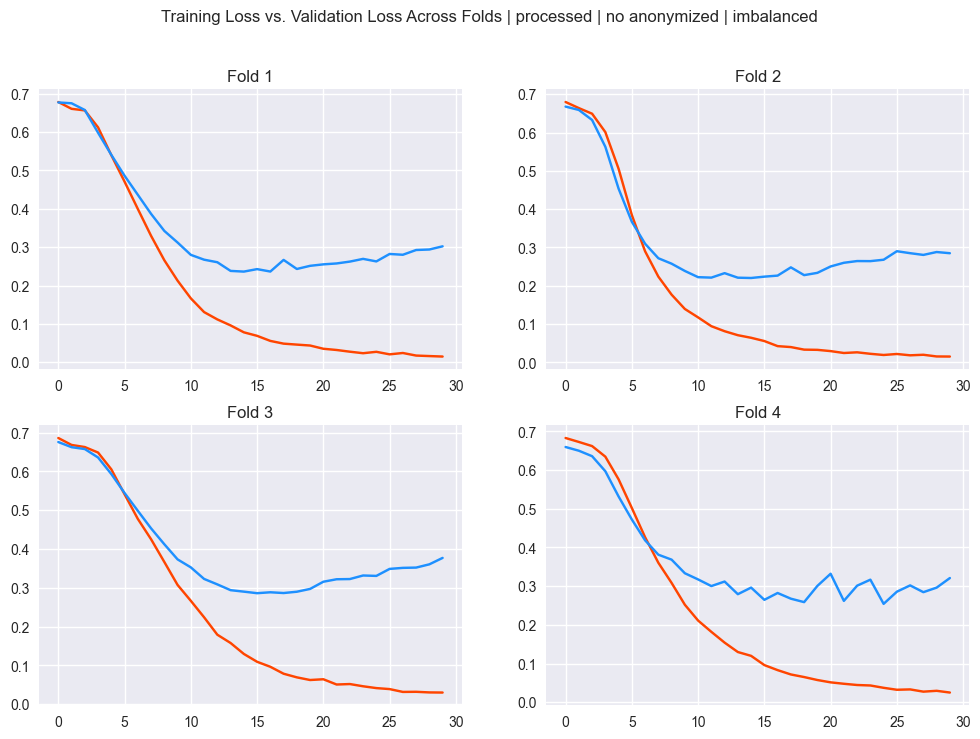

In [84]:
plotter.plot_subplots_curve(all_losses_5, all_val_losses_5,
                            "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | imbalanced")

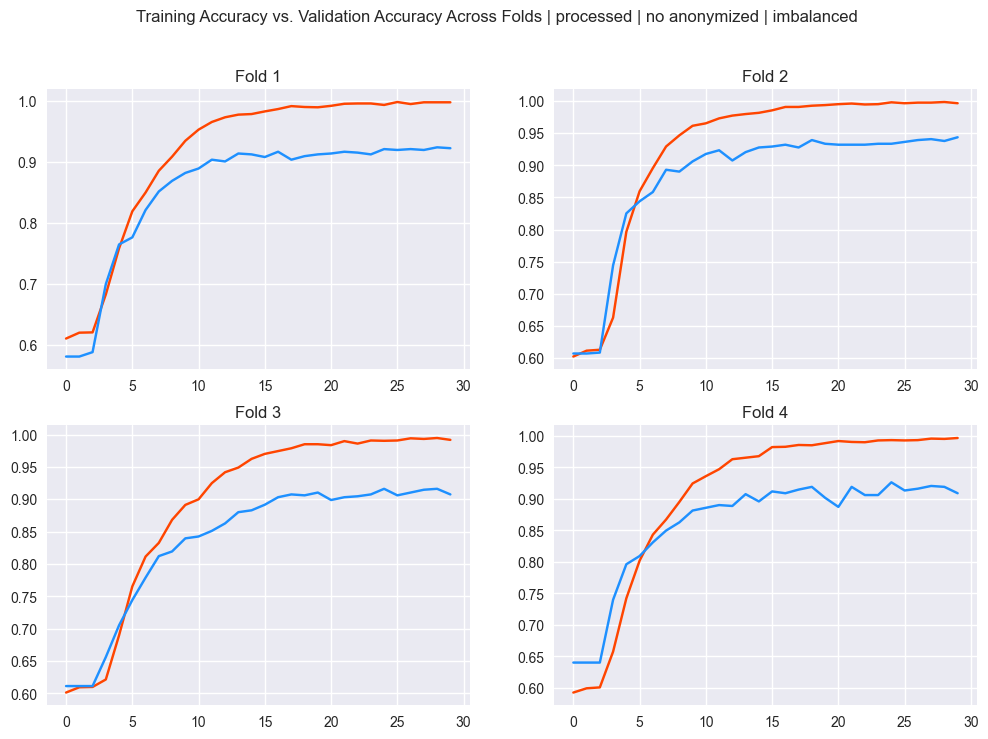

In [85]:
plotter.plot_subplots_curve(all_accuracies_5, all_val_accuracies_5,
                            "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | imbalanced")

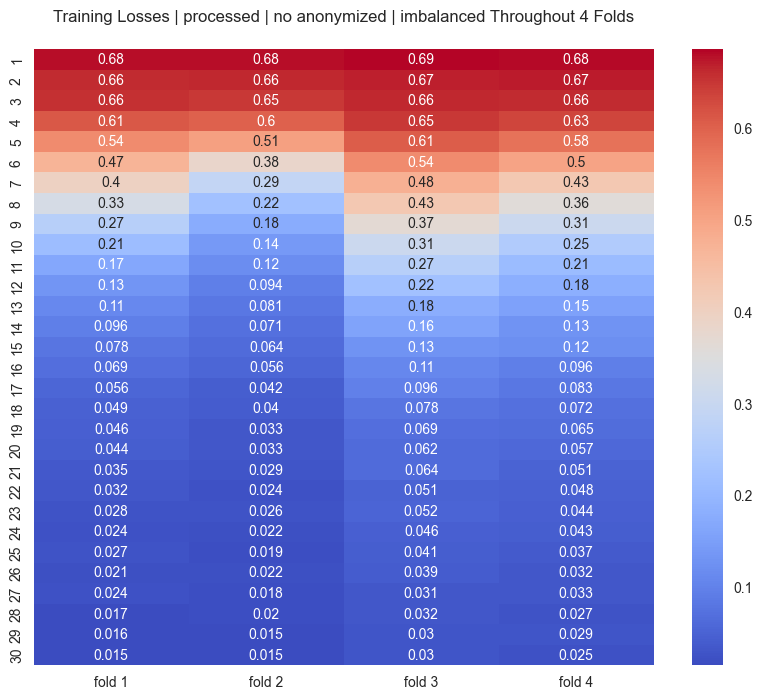

In [86]:
plotter.plot_heatmap(
    all_losses_5, "Training Losses | processed | no anonymized | imbalanced")

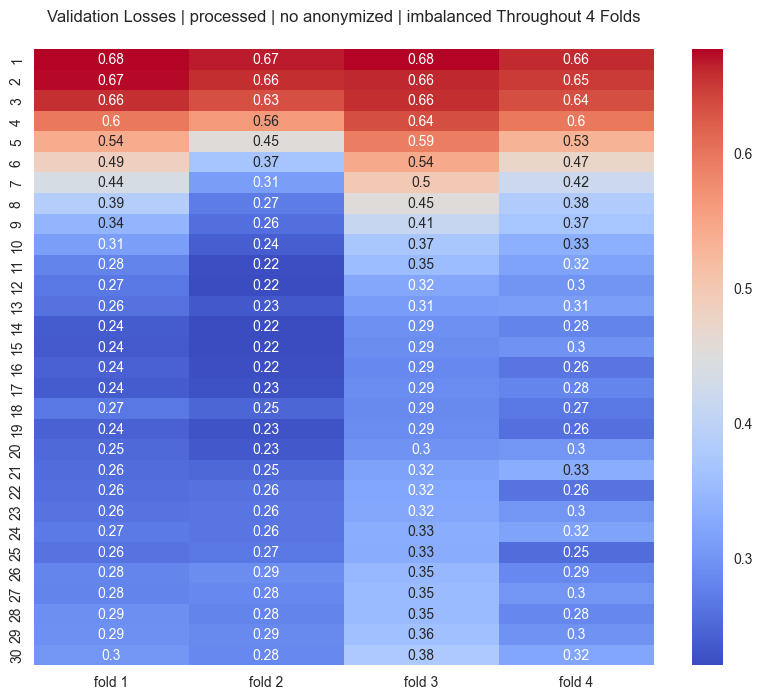

In [87]:
plotter.plot_heatmap(
    all_val_losses_5, "Validation Losses | processed | no anonymized | imbalanced")


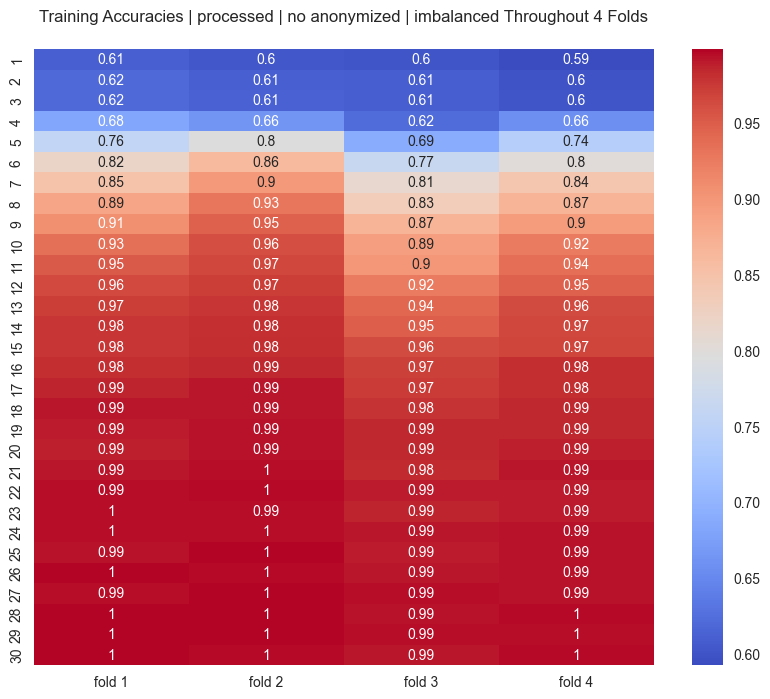

In [88]:
plotter.plot_heatmap(
    all_accuracies_5, "Training Accuracies | processed | no anonymized | imbalanced")


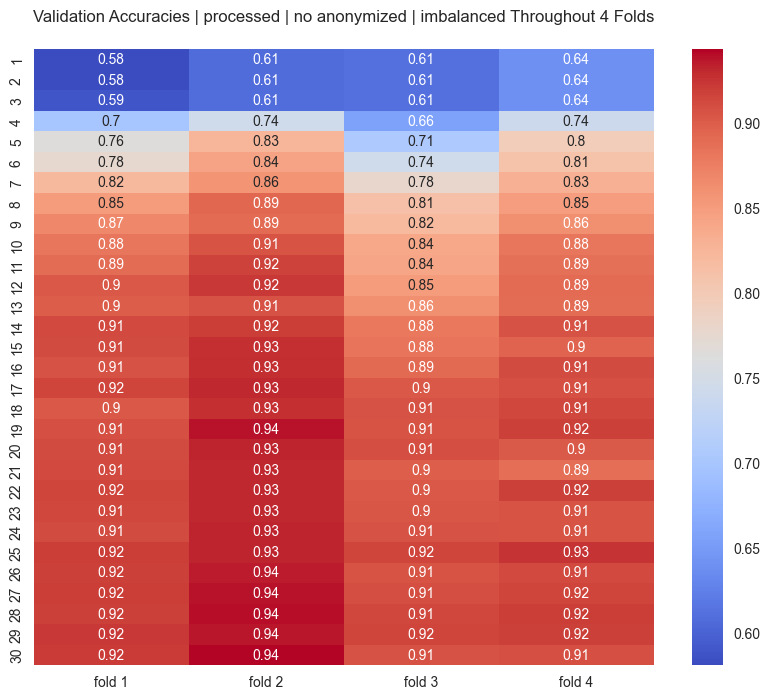

In [89]:
plotter.plot_heatmap(all_val_accuracies_5,
                     "Validation Accuracies | processed | no anonymized | imbalanced")


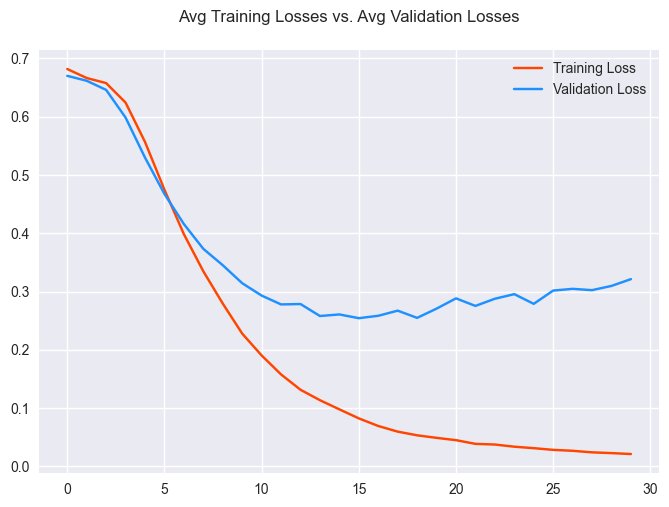

In [90]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses",
                            avg_loss_hist_5, avg_val_loss_hist_5, "Training Loss", "Validation Loss")


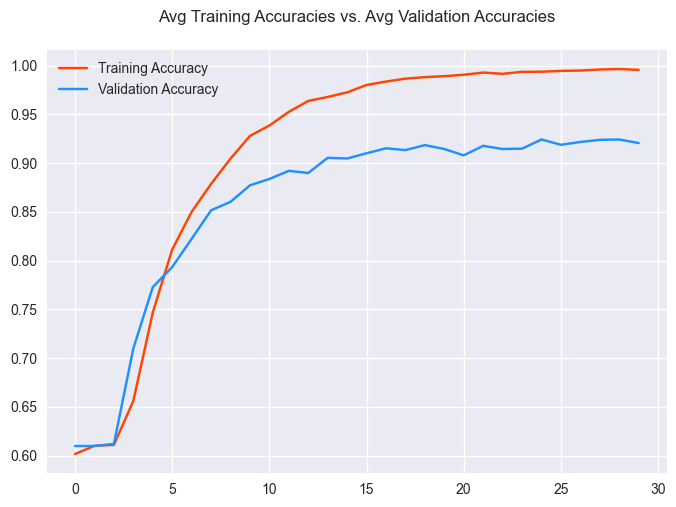

In [91]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies",
                            avg_acc_hist_5, avg_val_acc_hist_5, "Training Accuracy", "Validation Accuracy")


22/22 [==============================] - 1s 14ms/step


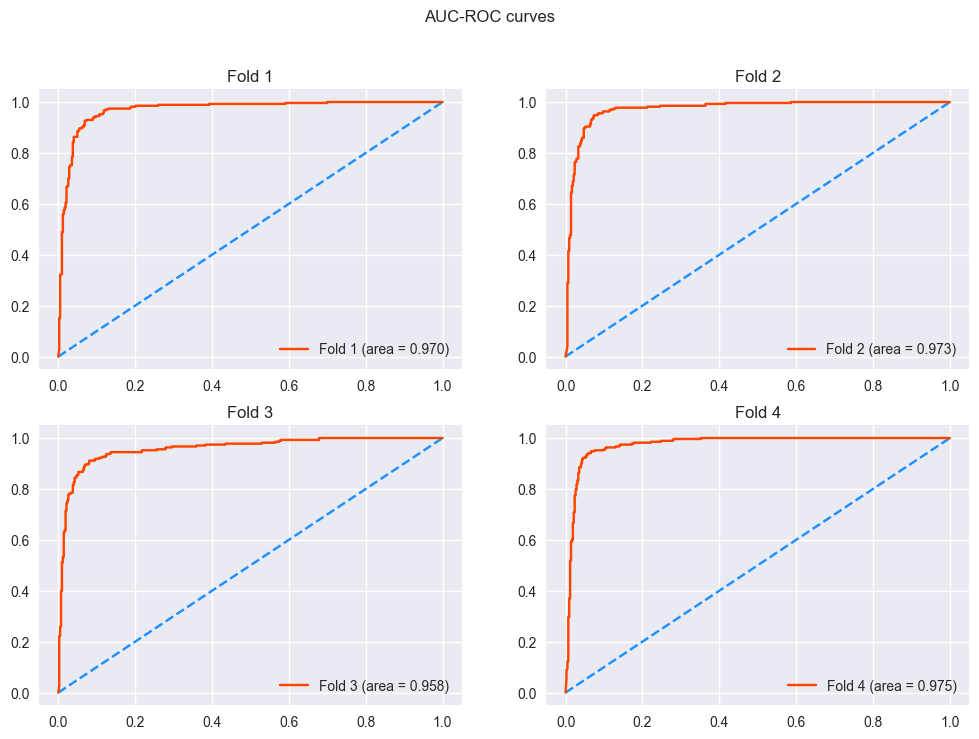

In [92]:
plotter.plot_roc_curve(all_models_5, X_test_vectors_5, y_test)


22/22 [==============================] - 0s 16ms/step


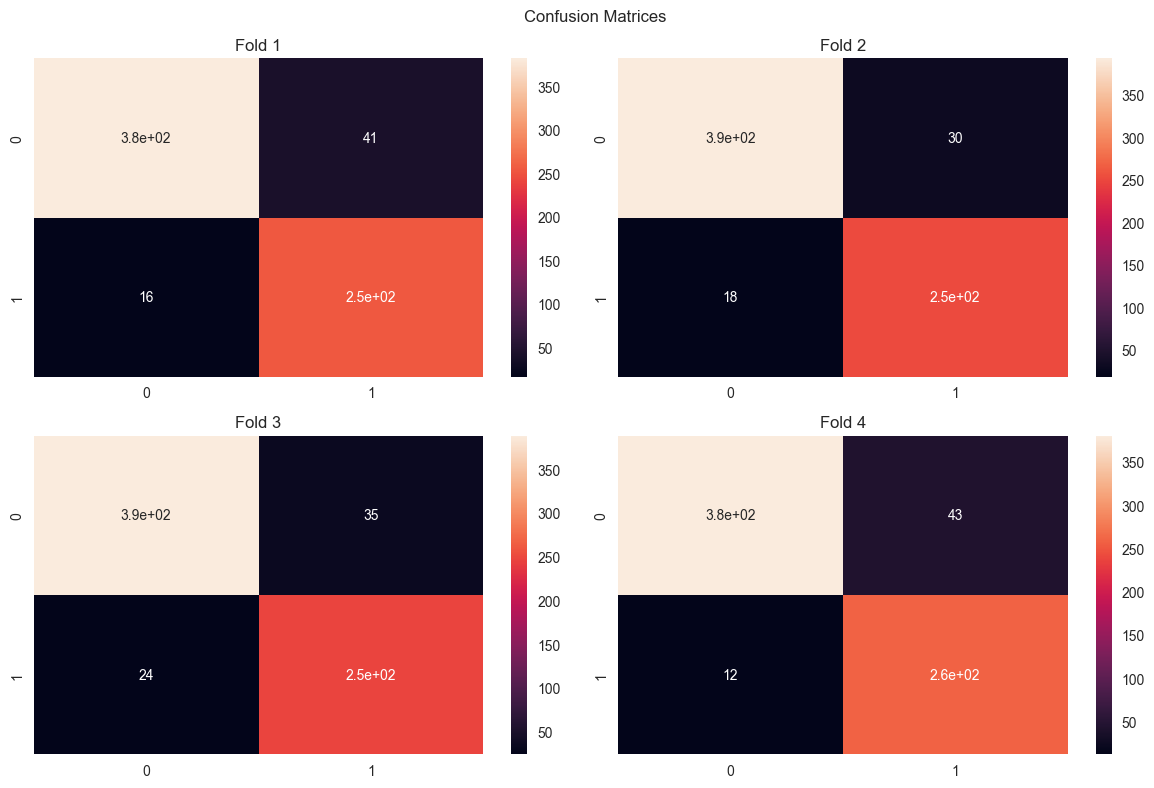

In [93]:
plotter.plot_confusion_matrix(all_models_5, X_test_vectors_5, y_test)


In [94]:
for i, trained_model in enumerate(all_models_5):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_5, y_test))


Model 1:
22/22 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       423
           1       0.86      0.94      0.90       270

    accuracy                           0.92       693
   macro avg       0.91      0.92      0.91       693
weighted avg       0.92      0.92      0.92       693

Model 2:
22/22 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       423
           1       0.89      0.93      0.91       270

    accuracy                           0.93       693
   macro avg       0.92      0.93      0.93       693
weighted avg       0.93      0.93      0.93       693

Model 3:
22/22 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.88      0.91      0.89     

In [95]:
print_testing_loss_accuracy(all_models_5, X_test_vectors_5, y_test)


model: 1
22/22 [==============================] - 0s 14ms/step - loss: 0.3042 - accuracy: 0.9177
model: 2
22/22 [==============================] - 0s 14ms/step - loss: 0.3006 - accuracy: 0.9307
model: 3
22/22 [==============================] - 0s 14ms/step - loss: 0.3550 - accuracy: 0.9149
model: 4
22/22 [==============================] - 0s 16ms/step - loss: 0.2961 - accuracy: 0.9206
average testing loss: 0.314
average testing accuracy: 0.921


### Combination 6: (Processing - No anonymization - Balancing)


In [96]:
processed_balanced_df = preprocessor.balance_data(X_train_processed, y_train)
X_train_processed_balanced = processed_balanced_df["Facts"]
y_train_processed_balanced = processed_balanced_df["winner_index"]


In [97]:
text_vectorizer_6, X_train_vectors_6 = preprocessor.convert_text_to_vectors_cnn(X_train_processed_balanced)

In [98]:
X_test_vectors_6 = preprocessor.convert_text_to_vectors_cnn(X_test_processed, train=False, text_vectorizer=text_vectorizer_6)

In [99]:
all_models_6, all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6 = train_model(build_cnn_model, X_train_vectors_6, y_train_processed_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 10s 111ms/step - loss: 0.6922 - accuracy: 0.5179 - val_loss: 0.6880 - val_accuracy: 0.5680
Epoch 2/30
40/40 [==============================] - 4s 101ms/step - loss: 0.6726 - accuracy: 0.6764 - val_loss: 0.6490 - val_accuracy: 0.7089
Epoch 3/30
40/40 [==============================] - 3s 87ms/step - loss: 0.5962 - accuracy: 0.7469 - val_loss: 0.5395 - val_accuracy: 0.7669
Epoch 4/30
40/40 [==============================] - 3s 82ms/step - loss: 0.4868 - accuracy: 0.7915 - val_loss: 0.4543 - val_accuracy: 0.8059
Epoch 5/30
40/40 [==============================] - 3s 81ms/step - loss: 0.3923 - accuracy: 0.8380 - val_loss: 0.3709 - val_accuracy: 0.8544
Epoch 6/30
40/40 [==============================] - 3s 78ms/step - loss: 0.3058 - accuracy: 0.8873 - val_loss: 0.3157 - val_accuracy: 0.8746
Epoch 7/30
40/40 [==============================] - 3s 74ms/step - loss: 0.2342 - accuracy: 0.9184 - val_loss: 0.2703 - val_accuracy: 0.9041
Ep

In [100]:
avg_loss_hist_6, avg_val_loss_hist_6, avg_acc_hist_6, avg_val_acc_hist_6 = calculate_average_measures(all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6)

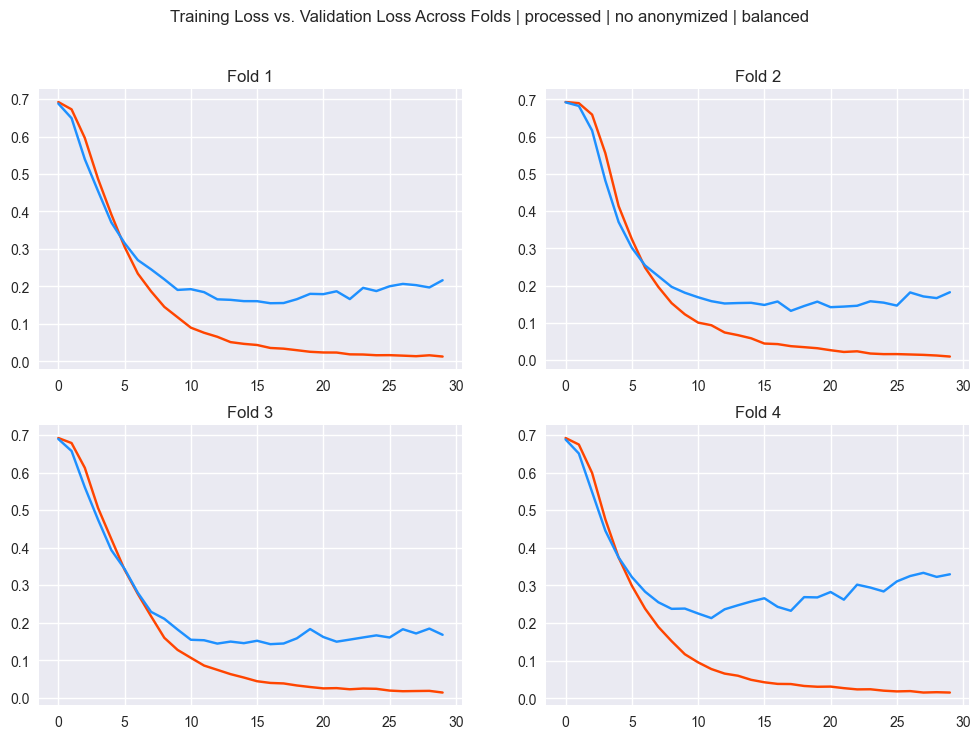

In [101]:
plotter.plot_subplots_curve(all_losses_6, all_val_losses_6, "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | balanced")

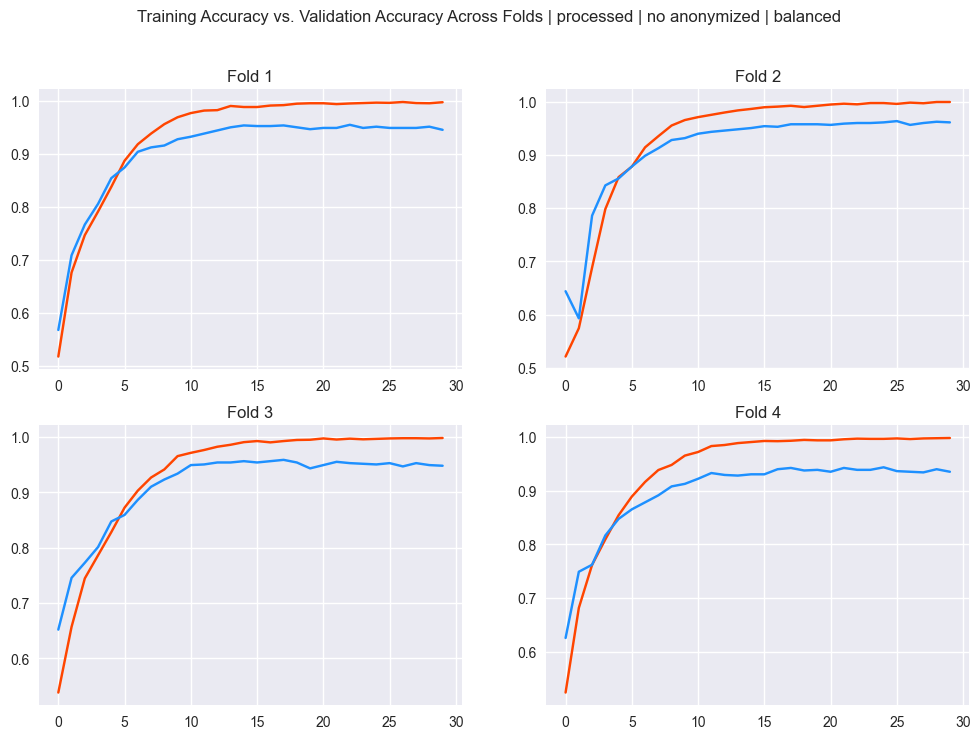

In [102]:
plotter.plot_subplots_curve(all_accuracies_6, all_val_accuracies_6, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | balanced")

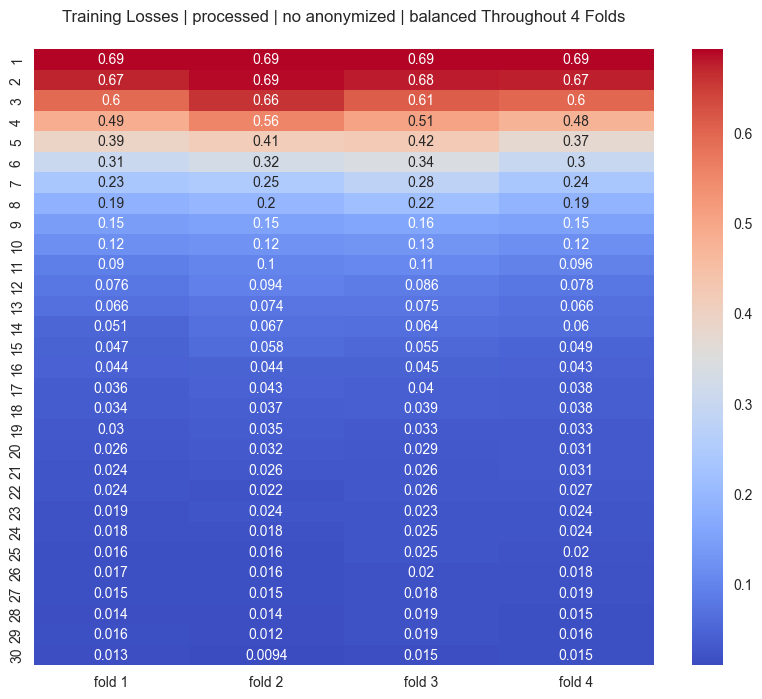

In [103]:
plotter.plot_heatmap(all_losses_6, "Training Losses | processed | no anonymized | balanced")

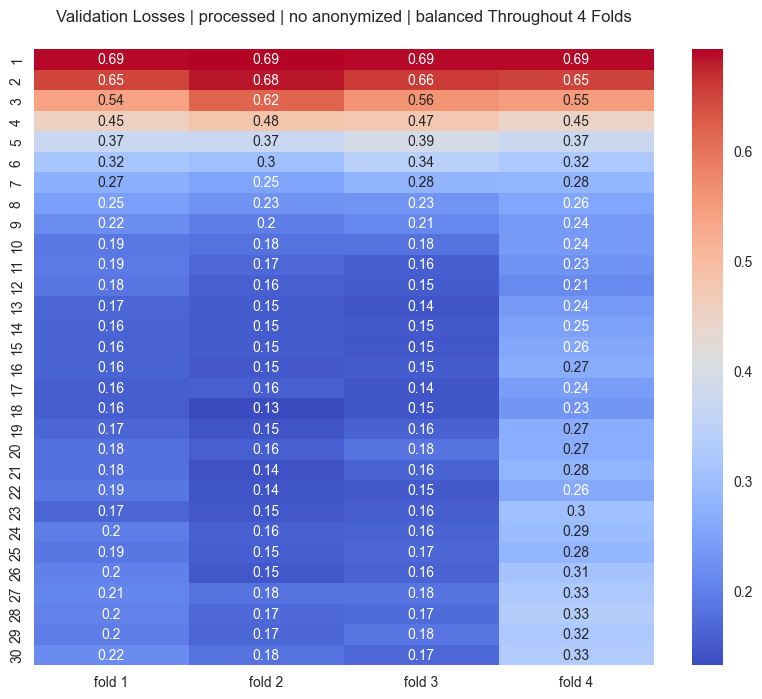

In [104]:
plotter.plot_heatmap(all_val_losses_6, "Validation Losses | processed | no anonymized | balanced")

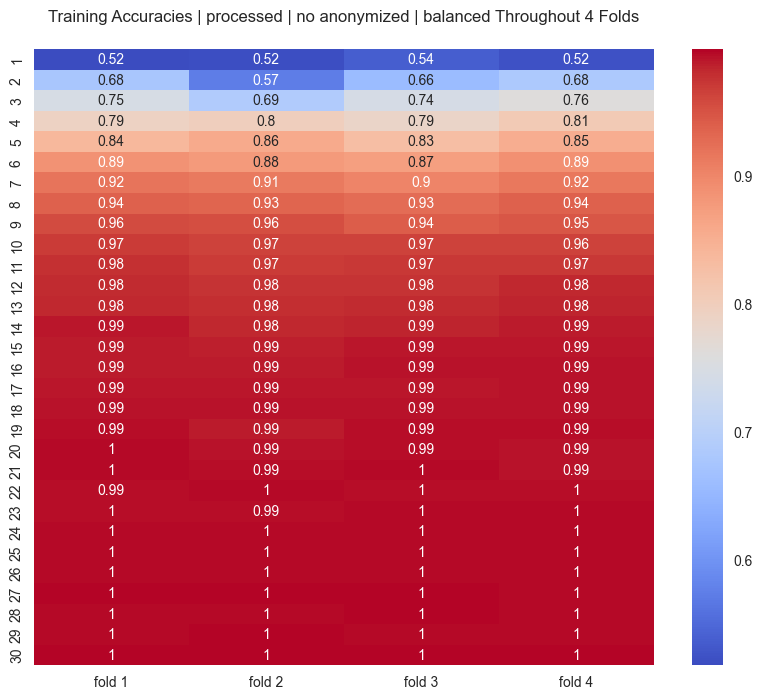

In [105]:
plotter.plot_heatmap(all_accuracies_6, "Training Accuracies | processed | no anonymized | balanced")

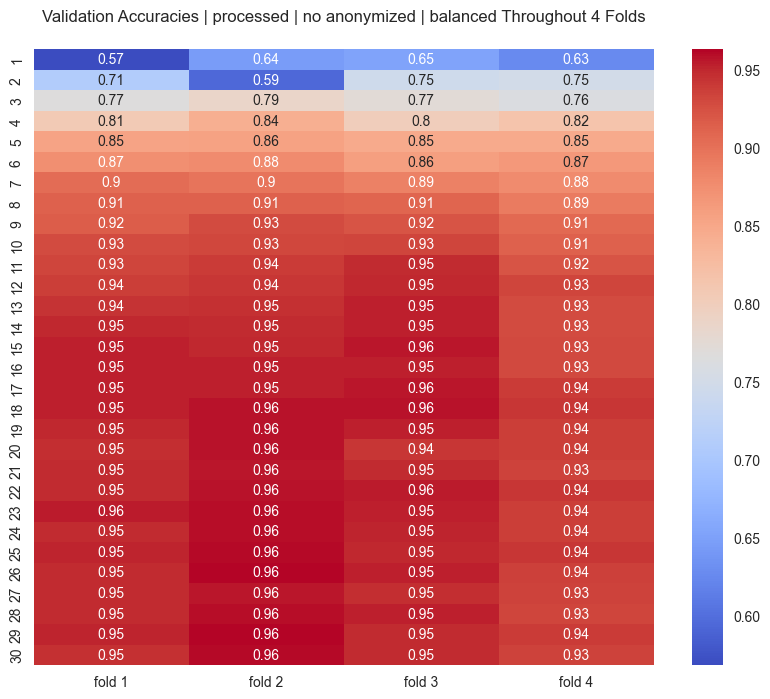

In [106]:
plotter.plot_heatmap(all_val_accuracies_6, "Validation Accuracies | processed | no anonymized | balanced")

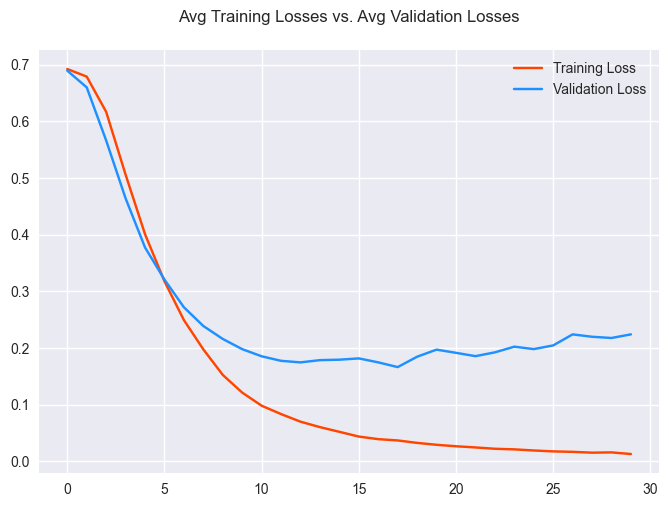

In [107]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_6, avg_val_loss_hist_6, "Training Loss", "Validation Loss")

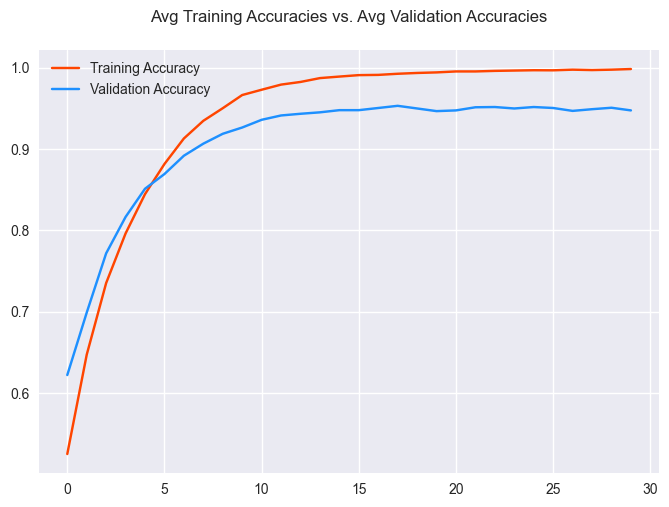

In [108]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_6, avg_val_acc_hist_6, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 14ms/step


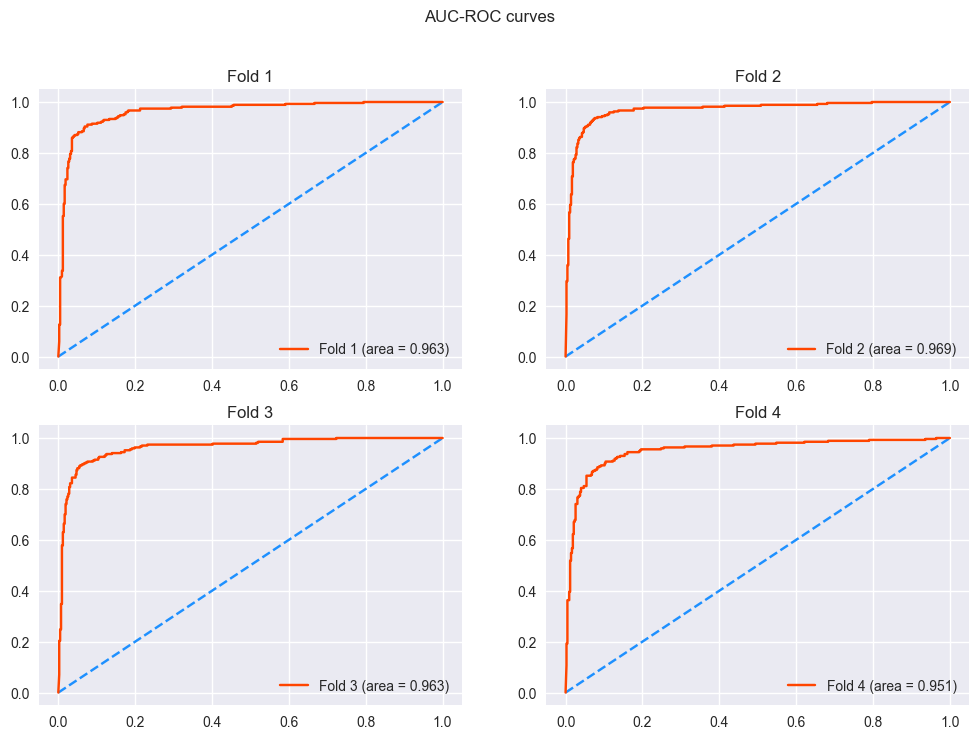

In [109]:
plotter.plot_roc_curve(all_models_6, X_test_vectors_6, y_test)

22/22 [==============================] - 0s 14ms/step


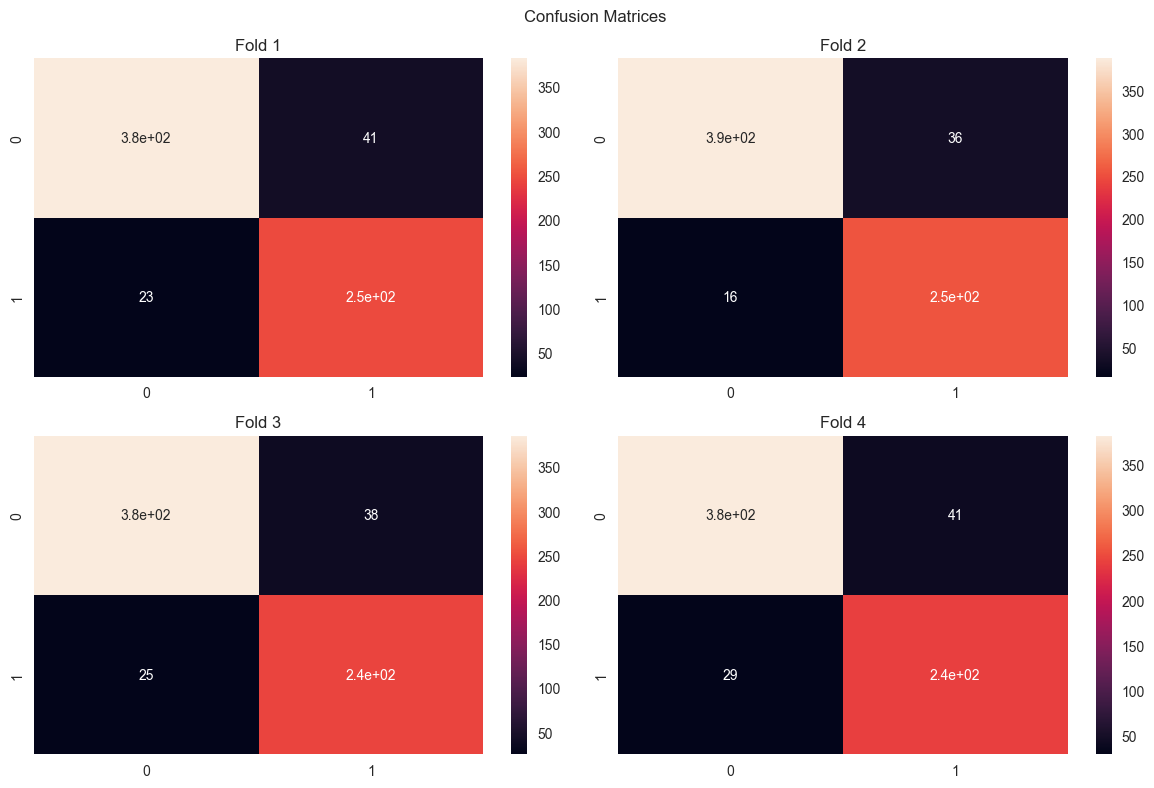

In [110]:
plotter.plot_confusion_matrix(all_models_6, X_test_vectors_6, y_test)

In [111]:
for i, trained_model in enumerate(all_models_6):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_6, y_test))

Model 1:
22/22 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       423
           1       0.86      0.91      0.89       270

    accuracy                           0.91       693
   macro avg       0.90      0.91      0.90       693
weighted avg       0.91      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       423
           1       0.88      0.94      0.91       270

    accuracy                           0.92       693
   macro avg       0.92      0.93      0.92       693
weighted avg       0.93      0.92      0.93       693

Model 3:
22/22 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       423
           1       0.87      0.91      0.89     

In [112]:
print_testing_loss_accuracy(all_models_6, X_test_vectors_6, y_test)

model: 1
22/22 [==============================] - 0s 16ms/step - loss: 0.3815 - accuracy: 0.9076
model: 2
22/22 [==============================] - 0s 16ms/step - loss: 0.3628 - accuracy: 0.9250
model: 3
22/22 [==============================] - 0s 16ms/step - loss: 0.3734 - accuracy: 0.9091
model: 4
22/22 [==============================] - 0s 15ms/step - loss: 0.4571 - accuracy: 0.8990
average testing loss: 0.394
average testing accuracy: 0.910


### Combination 7: (Processing - anonymization - Imbalancing)


In [113]:
X_train_processed_anonymized = preprocessor.preprocess_data(anonymized_facts_4)

In [114]:
X_test_processed_anonymized = preprocessor.preprocess_data(test_anonymized_facts_4)

In [115]:
text_vectorizer_7, X_train_vectors_7 = preprocessor.convert_text_to_vectors_cnn(X_train_processed_anonymized)

In [116]:
X_test_vectors_7 = preprocessor.convert_text_to_vectors_cnn(X_test_processed_anonymized, train=False, text_vectorizer=text_vectorizer_7)

In [117]:
all_models_7, all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7 = train_model(build_cnn_model, X_train_vectors_7, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 7s 92ms/step - loss: 0.6722 - accuracy: 0.6152 - val_loss: 0.6782 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 2s 71ms/step - loss: 0.6639 - accuracy: 0.6210 - val_loss: 0.6701 - val_accuracy: 0.5780
Epoch 3/30
33/33 [==============================] - 2s 72ms/step - loss: 0.6428 - accuracy: 0.6296 - val_loss: 0.6459 - val_accuracy: 0.6098
Epoch 4/30
33/33 [==============================] - 2s 69ms/step - loss: 0.6084 - accuracy: 0.7056 - val_loss: 0.6056 - val_accuracy: 0.6821
Epoch 5/30
33/33 [==============================] - 2s 71ms/step - loss: 0.5571 - accuracy: 0.7537 - val_loss: 0.5593 - val_accuracy: 0.7428
Epoch 6/30
33/33 [==============================] - 2s 72ms/step - loss: 0.4940 - accuracy: 0.8023 - val_loss: 0.5176 - val_accuracy: 0.7616
Epoch 7/30
33/33 [==============================] - 2s 73ms/step - loss: 0.4440 - accuracy: 0.8215 - val_loss: 0.4758 - val_accuracy: 0.7847
Epoch

In [118]:
avg_loss_hist_7, avg_val_loss_hist_7, avg_acc_hist_7, avg_val_acc_hist_7 = calculate_average_measures(all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7)

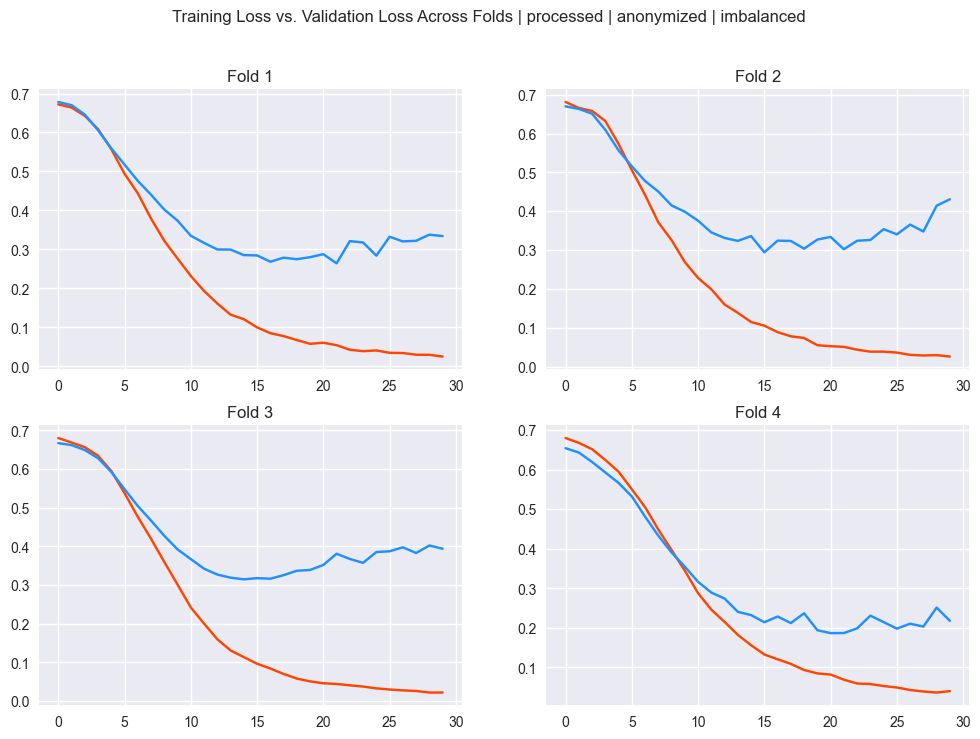

In [119]:
plotter.plot_subplots_curve(all_losses_7, all_val_losses_7, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | imbalanced")

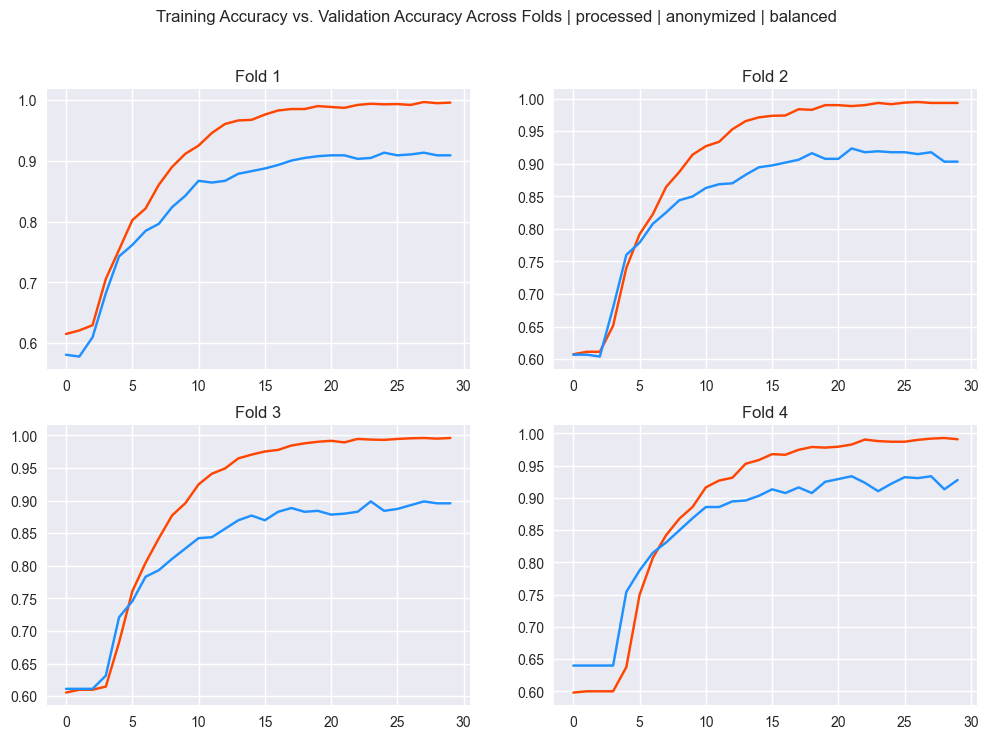

In [120]:
plotter.plot_subplots_curve(all_accuracies_7, all_val_accuracies_7, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | balanced")

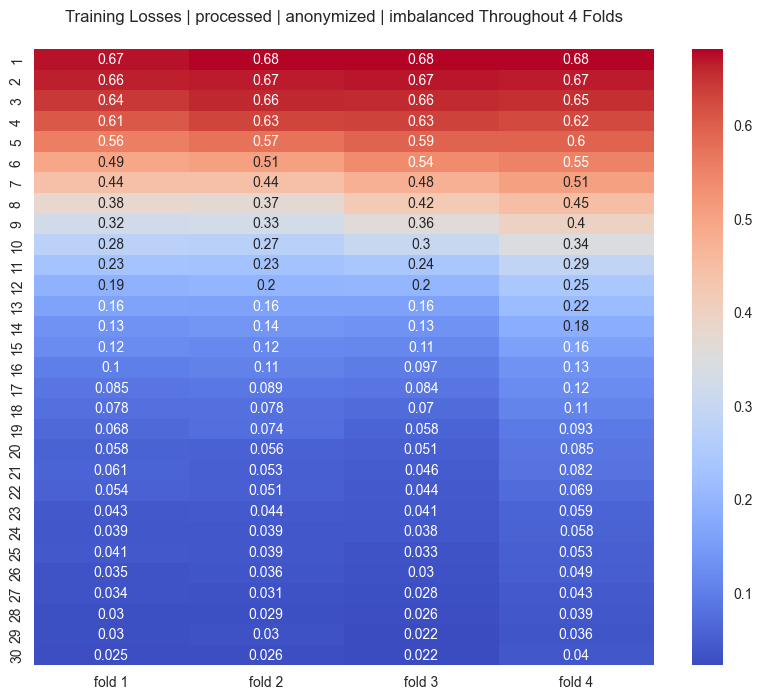

In [121]:
plotter.plot_heatmap(all_losses_7, "Training Losses | processed | anonymized | imbalanced")

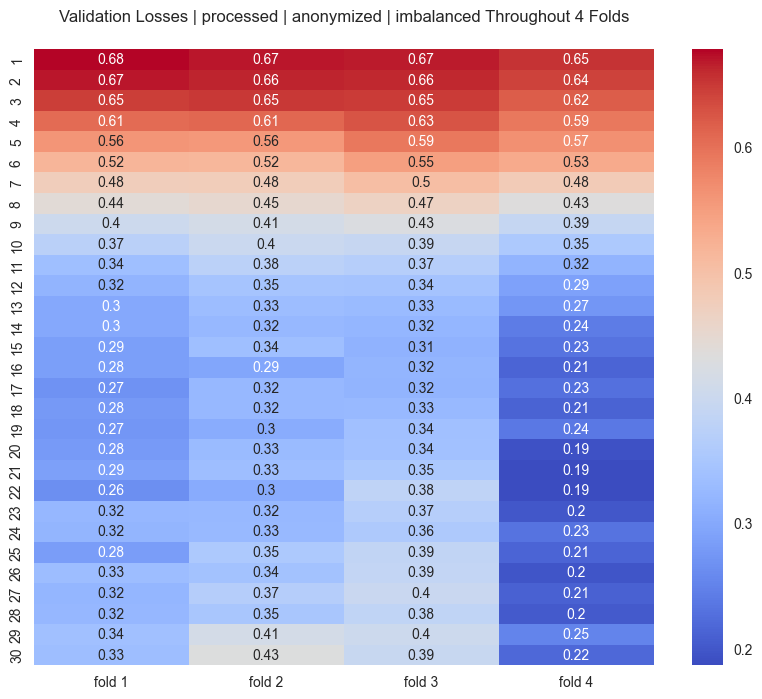

In [122]:
plotter.plot_heatmap(all_val_losses_7, "Validation Losses | processed | anonymized | imbalanced")

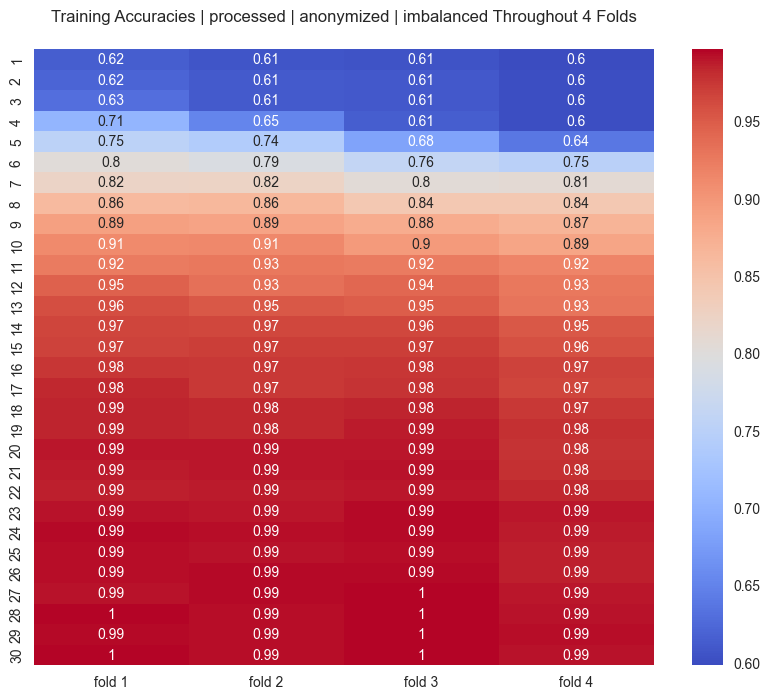

In [123]:
plotter.plot_heatmap(all_accuracies_7, "Training Accuracies | processed | anonymized | imbalanced")

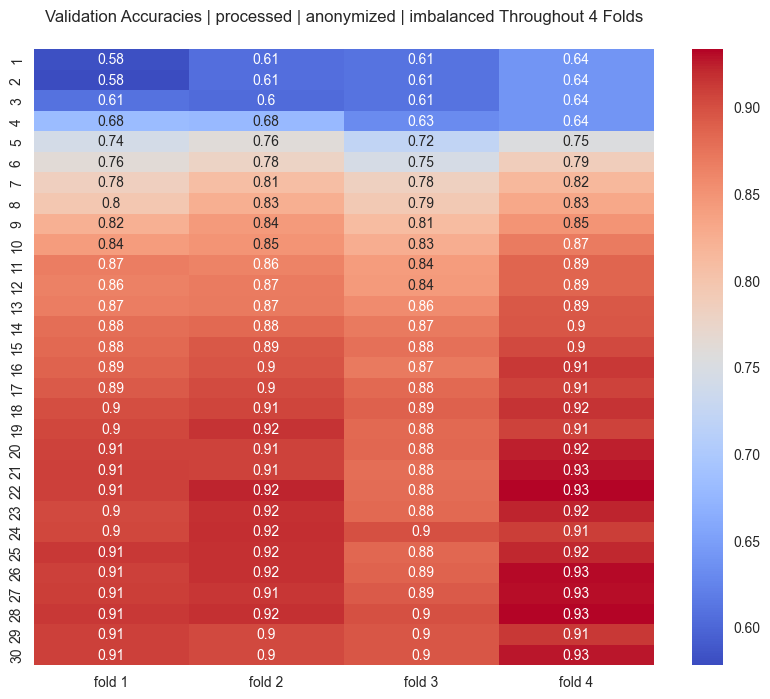

In [124]:
plotter.plot_heatmap(all_val_accuracies_7, "Validation Accuracies | processed | anonymized | imbalanced")

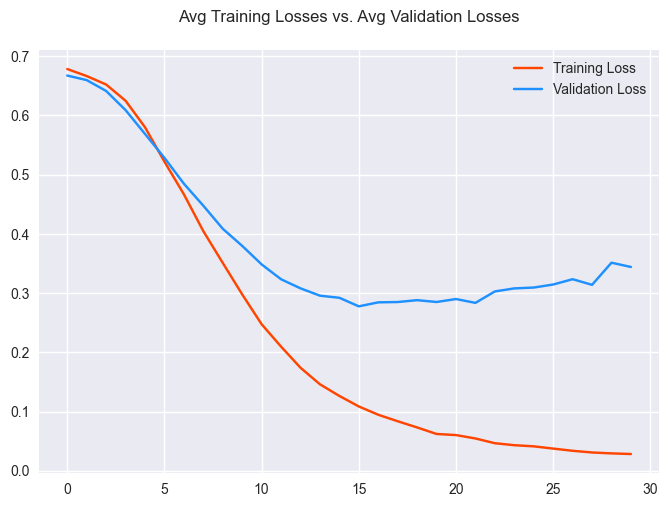

In [125]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_7, avg_val_loss_hist_7, "Training Loss", "Validation Loss")

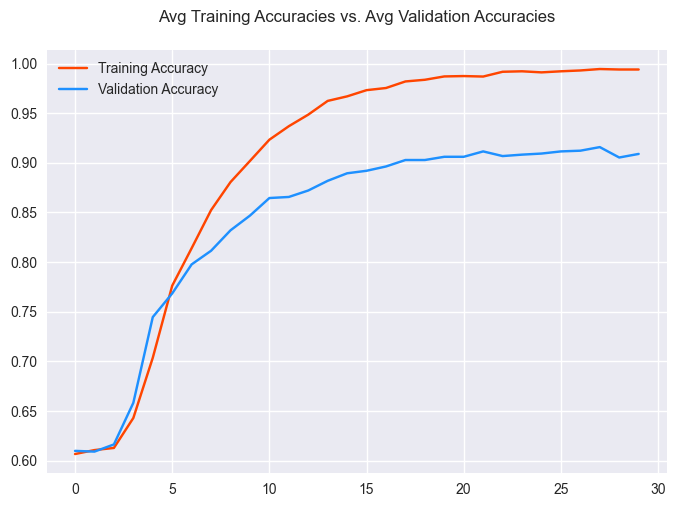

In [126]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_7, avg_val_acc_hist_7, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 15ms/step


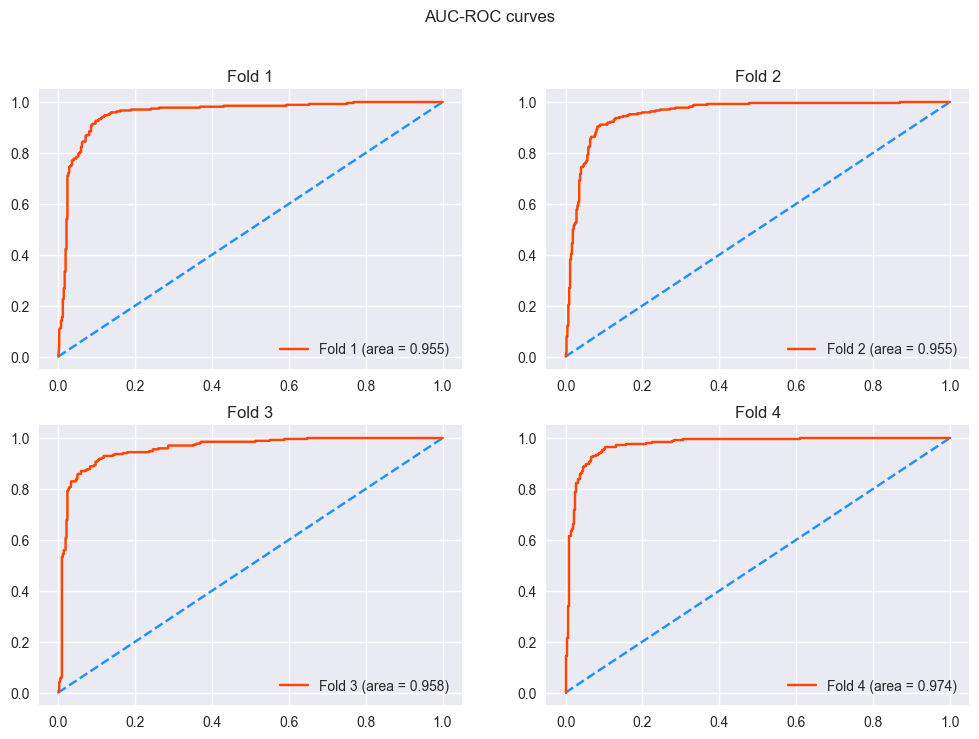

In [127]:
plotter.plot_roc_curve(all_models_7, X_test_vectors_7, y_test)

22/22 [==============================] - 0s 14ms/step


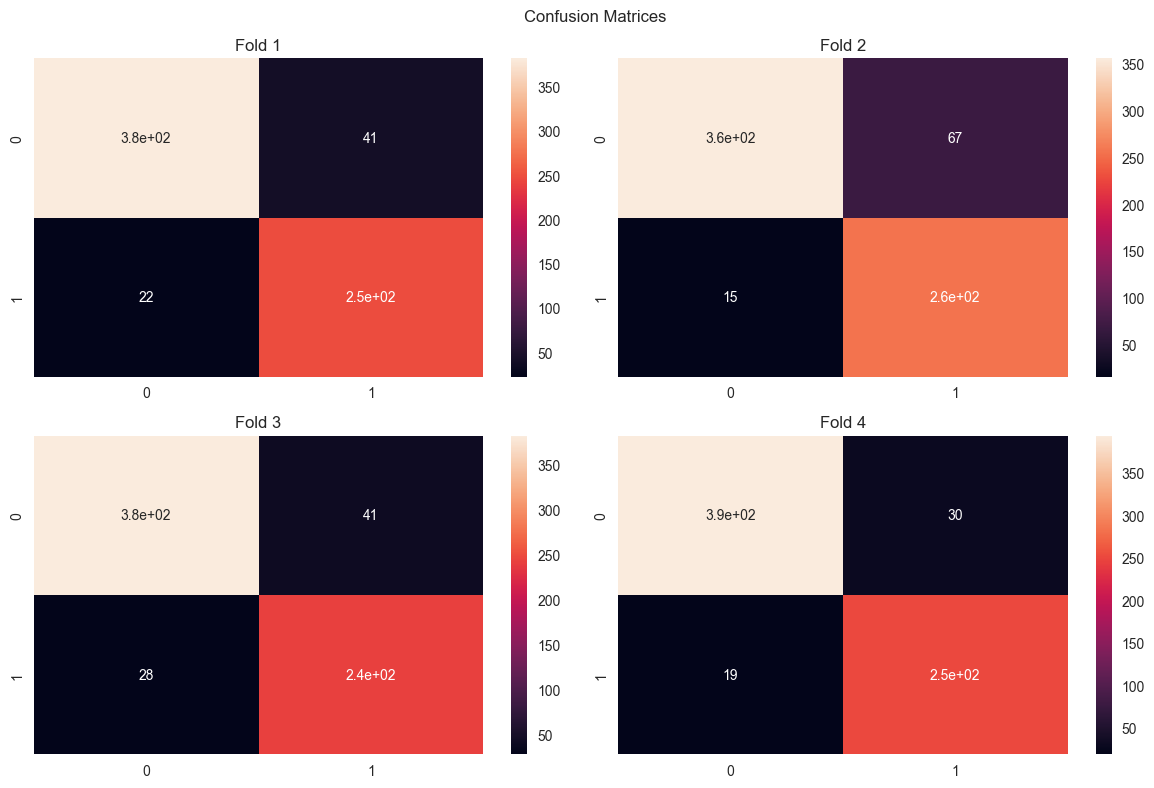

In [128]:
plotter.plot_confusion_matrix(all_models_7, X_test_vectors_7, y_test)

In [129]:
for i, trained_model in enumerate(all_models_7):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_7, y_test))

Model 1:
22/22 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       423
           1       0.86      0.92      0.89       270

    accuracy                           0.91       693
   macro avg       0.90      0.91      0.91       693
weighted avg       0.91      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       423
           1       0.79      0.94      0.86       270

    accuracy                           0.88       693
   macro avg       0.88      0.89      0.88       693
weighted avg       0.89      0.88      0.88       693

Model 3:
22/22 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       423
           1       0.86      0.90      0.88     

In [130]:
print_testing_loss_accuracy(all_models_7, X_test_vectors_7, y_test)

model: 1
22/22 [==============================] - 0s 15ms/step - loss: 0.3817 - accuracy: 0.9091
model: 2
22/22 [==============================] - 0s 14ms/step - loss: 0.4620 - accuracy: 0.8817
model: 3
22/22 [==============================] - 0s 14ms/step - loss: 0.3707 - accuracy: 0.9004
model: 4
22/22 [==============================] - 0s 13ms/step - loss: 0.2341 - accuracy: 0.9293
average testing loss: 0.362
average testing accuracy: 0.905


### Combination 8: (Processing - anonymization - Balancing)


In [131]:
processed_anonymized_balanced_df = preprocessor.balance_data(X_train_processed_anonymized, y_train)
processed_anonymized_balanced_df = processed_anonymized_balanced_df.rename(columns={0: "Facts"})

In [132]:
X_train_processed_anonymized_balanced = processed_anonymized_balanced_df["Facts"]
y_train_processed_anonymized_balanced = processed_anonymized_balanced_df["winner_index"]

In [133]:
text_vectorizer_8, X_train_vectors_8 = preprocessor.convert_text_to_vectors_cnn(X_train_processed_anonymized_balanced)

In [134]:
X_test_vectors_8 = preprocessor.convert_text_to_vectors_cnn(X_test_processed_anonymized, train=False, text_vectorizer=text_vectorizer_8)

In [135]:
all_models_8, all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8 = train_model(build_cnn_model, X_train_vectors_8, y_train_processed_anonymized_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 8s 91ms/step - loss: 0.6920 - accuracy: 0.5369 - val_loss: 0.6896 - val_accuracy: 0.6544
Epoch 2/30
40/40 [==============================] - 3s 76ms/step - loss: 0.6785 - accuracy: 0.6590 - val_loss: 0.6580 - val_accuracy: 0.7041
Epoch 3/30
40/40 [==============================] - 3s 73ms/step - loss: 0.6144 - accuracy: 0.7249 - val_loss: 0.5721 - val_accuracy: 0.7515
Epoch 4/30
40/40 [==============================] - 3s 72ms/step - loss: 0.5113 - accuracy: 0.7879 - val_loss: 0.4714 - val_accuracy: 0.8012
Epoch 5/30
40/40 [==============================] - 3s 73ms/step - loss: 0.4103 - accuracy: 0.8368 - val_loss: 0.3845 - val_accuracy: 0.8497
Epoch 6/30
40/40 [==============================] - 3s 70ms/step - loss: 0.3132 - accuracy: 0.8865 - val_loss: 0.3203 - val_accuracy: 0.8793
Epoch 7/30
40/40 [==============================] - 3s 67ms/step - loss: 0.2423 - accuracy: 0.9192 - val_loss: 0.2697 - val_accuracy: 0.9041
Epoch

In [136]:
avg_loss_hist_8, avg_val_loss_hist_8, avg_acc_hist_8, avg_val_acc_hist_8 = calculate_average_measures(all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8)

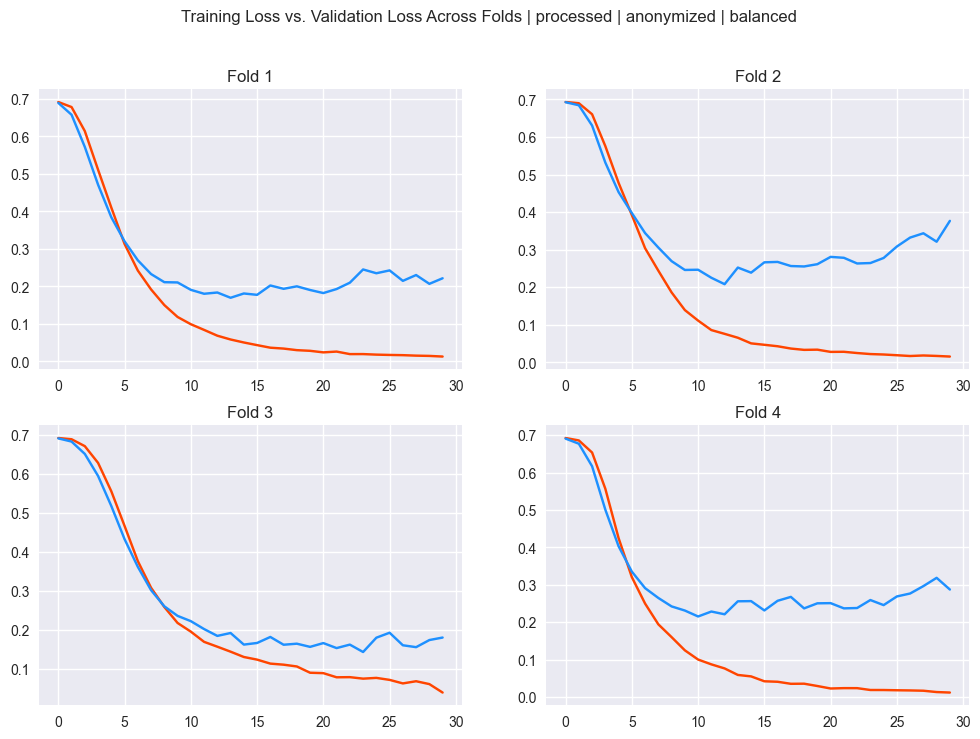

In [137]:
plotter.plot_subplots_curve(all_losses_8, all_val_losses_8, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | balanced")

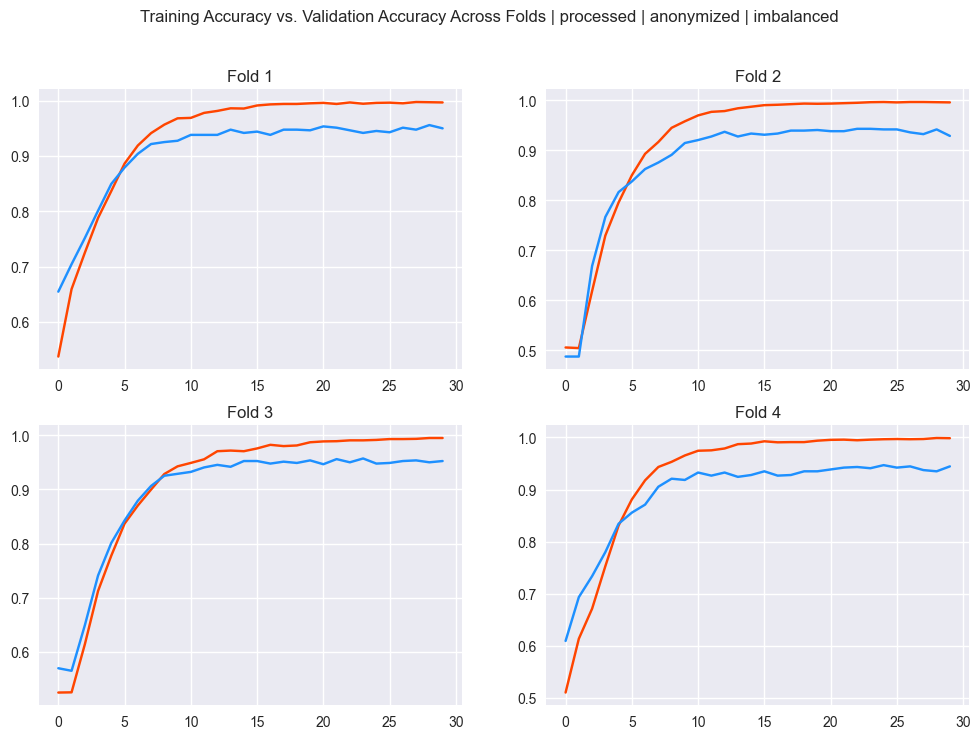

In [138]:
plotter.plot_subplots_curve(all_accuracies_8, all_val_accuracies_8, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | imbalanced")

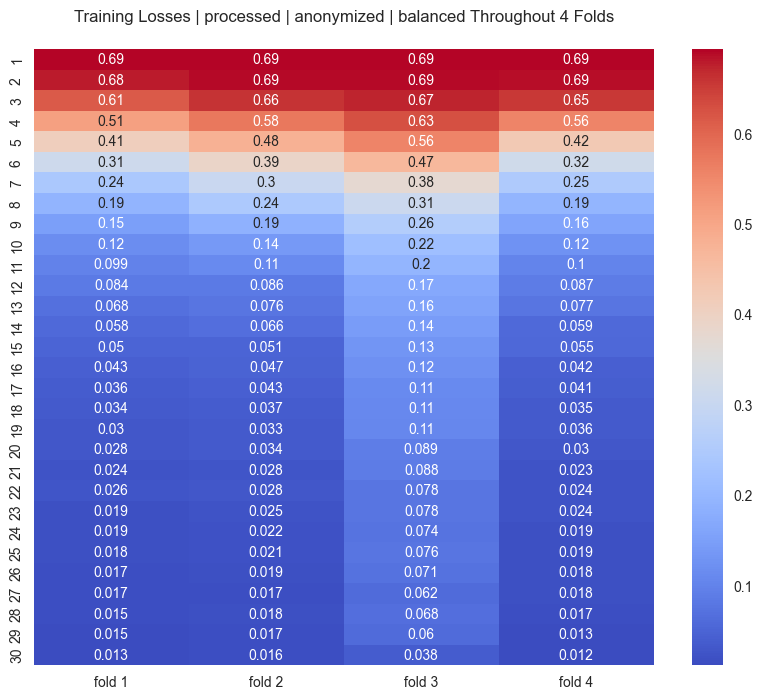

In [139]:
plotter.plot_heatmap(all_losses_8, "Training Losses | processed | anonymized | balanced")

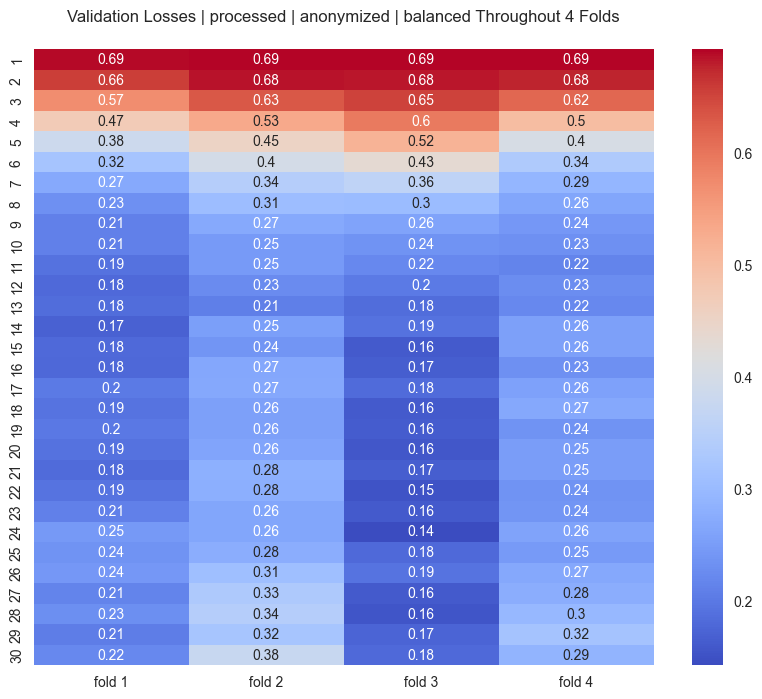

In [140]:
plotter.plot_heatmap(all_val_losses_8, "Validation Losses | processed | anonymized | balanced")

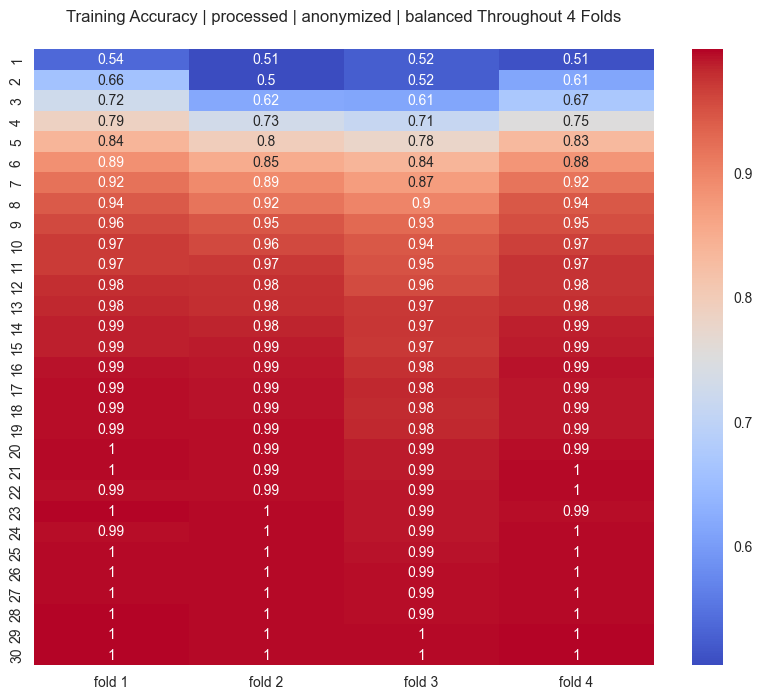

In [141]:
plotter.plot_heatmap(all_accuracies_8, "Training Accuracy | processed | anonymized | balanced")

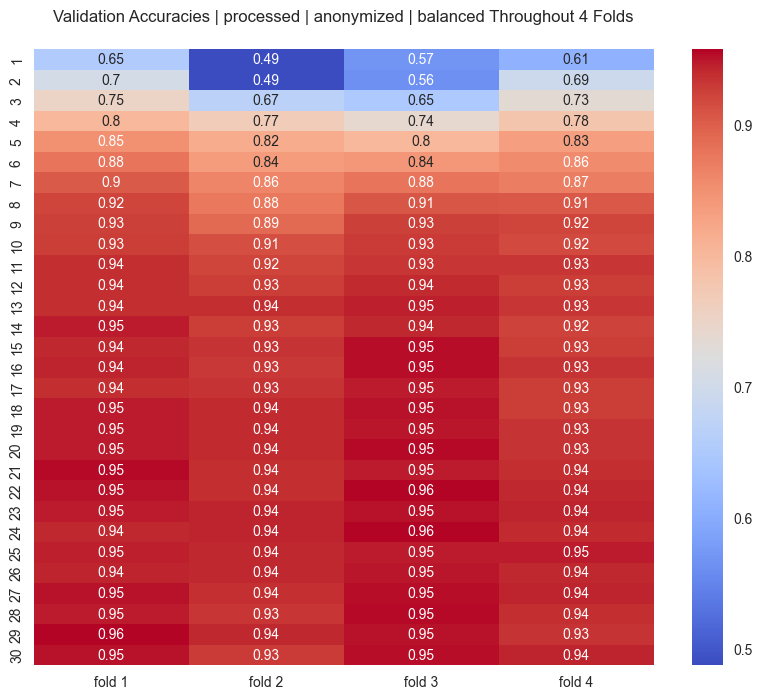

In [142]:
plotter.plot_heatmap(all_val_accuracies_8, "Validation Accuracies | processed | anonymized | balanced")

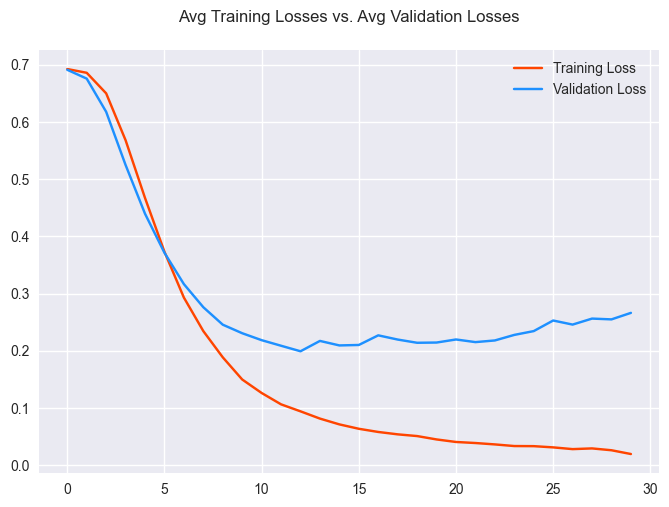

In [143]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_8, avg_val_loss_hist_8, "Training Loss", "Validation Loss")

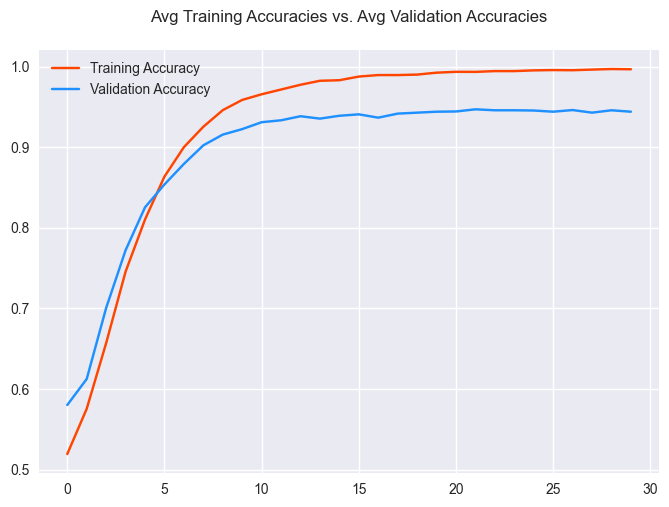

In [144]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_8, avg_val_acc_hist_8, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 1s 15ms/step


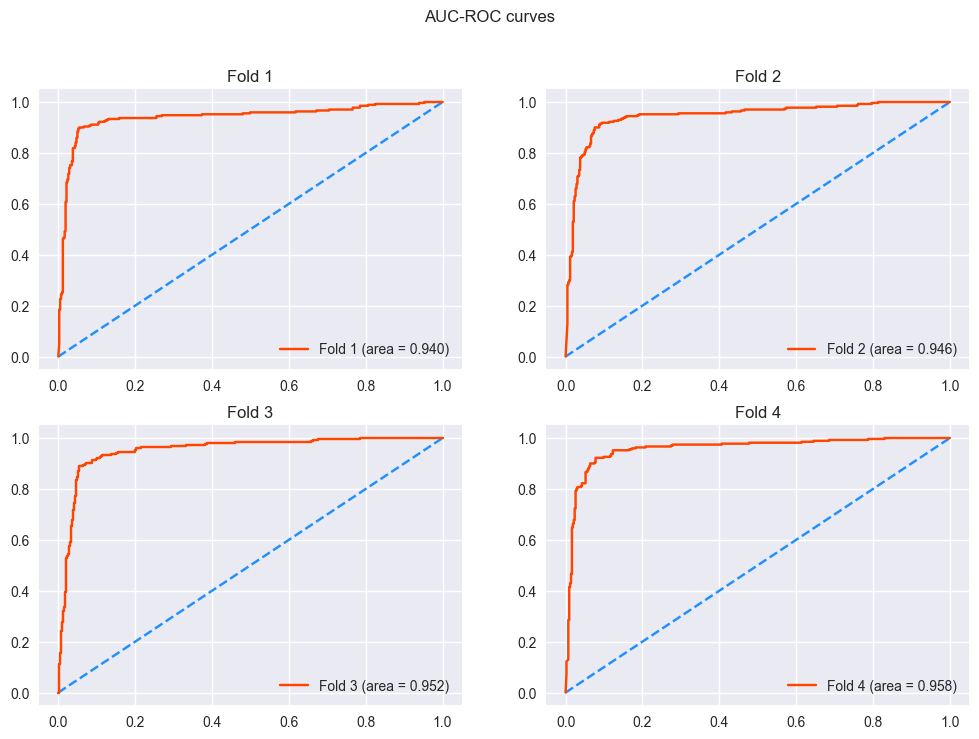

In [145]:
plotter.plot_roc_curve(all_models_8, X_test_vectors_8, y_test)

22/22 [==============================] - 0s 15ms/step


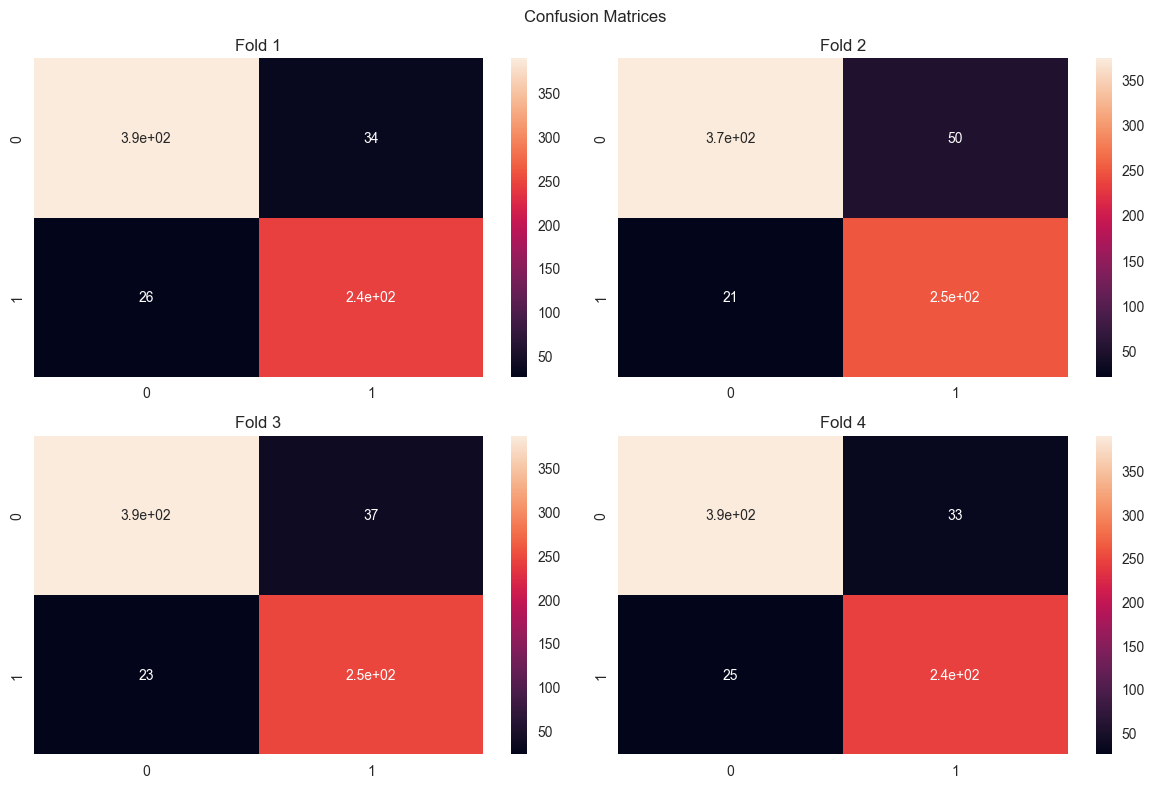

In [146]:
plotter.plot_confusion_matrix(all_models_8, X_test_vectors_8, y_test)

In [147]:
for i, trained_model in enumerate(all_models_8):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_8, y_test))

Model 1:
22/22 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.88      0.90      0.89       270

    accuracy                           0.91       693
   macro avg       0.91      0.91      0.91       693
weighted avg       0.91      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       423
           1       0.83      0.92      0.88       270

    accuracy                           0.90       693
   macro avg       0.89      0.90      0.89       693
weighted avg       0.90      0.90      0.90       693

Model 3:
22/22 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       423
           1       0.87      0.91      0.89     

In [148]:
print_testing_loss_accuracy(all_models_8, X_test_vectors_8, y_test)

model: 1
22/22 [==============================] - 1s 17ms/step - loss: 0.5042 - accuracy: 0.9134
model: 2
22/22 [==============================] - 0s 16ms/step - loss: 0.5522 - accuracy: 0.8975
model: 3
22/22 [==============================] - 0s 17ms/step - loss: 0.3772 - accuracy: 0.9134
model: 4
22/22 [==============================] - 0s 15ms/step - loss: 0.3962 - accuracy: 0.9163
average testing loss: 0.457
average testing accuracy: 0.910


### Saving Best Combination
There are 2 similar combinations which are: combination 2 (no preprocessing - no anonymization - balanced) and combination 5 (preprocessing - no anonymization - imbalance). Each of them has 4 results depending on the folds. As a final result, the best model generalizing well on testing data with the highest testing accuracy is **the second model of the second combination** with **0.933** testing accuracy and **0.325** testing loss.

In [150]:
all_models_2[1].save("models/best_cnn_model.h5")